# 0.사전준비

In [ ]:
!pip install xlwt
!pip install pandas
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 914.7 kB/s eta 0:00:00


In [ ]:
# # # #다운로드한 파일 압축풀기
# import zipfile

In [ ]:
# # [PC/colab 통합]파일다운로드(기본) 및 압축파일 해제
# !pip install gdown==4.5.1
# import gdown
# import zipfile
# print(gdown.__version__)
# google_path = "https://drive.google.com/uc?id="
# file_id = '1Wr-r1eoP9jqUjL1fJ_-KrJSm2c46wLFH'
# output_name = "2.data_edit.zip"
# gdown.download(google_path+file_id,output_name,quiet=False)
# fantasy_zip = zipfile.ZipFile("2.data_edit.zip")
# fantasy_zip.extractall()
# google_path = "https://drive.google.com/uc?id="
# file_id = '1gkjNoNIx5vdBNVGH91NlIG4DL5obyAgQ'
# output_name = "강의준비자료_COLAB용데이터.zip"
# gdown.download(google_path+file_id,output_name,quiet=False)
# fantasy_zip = zipfile.ZipFile("강의준비자료_COLAB용데이터.zip")
# fantasy_zip.extractall()

# # https://drive.google.com/file/d/1Wr-r1eoP9jqUjL1fJ_-KrJSm2c46wLFH/view?usp=sharing


In [ ]:
# !pip install gdown==4.5.1
# import gdown
# import zipfile
# print(gdown.__version__)
# google_path = "https://drive.google.com/uc?id="
# file_id = '1bfuR2iLaZLEIoviLZEO8cTprOkC7C1r3'
# output_name = "2.data_edit.zip"
# gdown.download(google_path+file_id,output_name,quiet=False)
# fantasy_zip = zipfile.ZipFile("2.data_edit.zip")
# fantasy_zip.extractall()

# 1.현업적용코드보기
- 폴더안에 있는 엑셀파일 확인하기
- 각각의 엑셀파일 열어서 상태확인하기
- (1개단위)각각의 엑셀파일을 내가 원하는 구조로 변경하여 데이터로 저장unit만들기
- (반복문) 전체 엑셀파일을 내가 원하는 구조로 변경하여 하나의 데이터로 저장
- 정리된 데이터파일을 pivot 을 사용해서 제품별 정리된 내용을 분할하여 저장하기

In [ ]:
#1 필요한 라이브러리 설치하기
import pandas as pd
import os

#기초 폴더
bacic_folder = 'new_data2' #new_data 한글데이터입니다/ 하지만 코랩에서 압축해제시 한글파일이 문제가 있을 수 있음
#영어로 전환을 원할경우 'new_dats2' 로 바꿔줘야함

#2 엑셀취합자료의 자료 가져오기
file_list = os.listdir(f"./{bacic_folder}")
file_list_xls = []
for a in file_list:
    if ".xls" in a:
        file_list_xls.append(a)
file_list_xls

#3.각각의 엑셀파일을 편집후와 함께 저장한다.
data_unit_sum = pd.DataFrame()
for b in file_list_xls:
    df = pd.read_excel(f"./{bacic_folder}/"+b)
    df['나라'] = b.split("_")[1]
    data_unit = df[['나라','조사제품','제목','내용']]
    data_unit_sum = pd.concat([data_unit_sum, data_unit], axis = 0)
data_unit_sum.to_excel('combined_excel.xlsx')

#4. 만들어진 파일을 기반으로 제품별로 구분하여 분할 저장하기
product_list = data_unit_sum['조사제품'].value_counts()
for d in dict(product_list):
    xls_name = data_unit_sum[data_unit_sum['조사제품']==d]
    xls_name.to_excel(f"{d}.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: './new_data2'

# 2.Pandas 기본문법

In [ ]:
#p_1판다스 라이브러리 설치
!pip install pandas
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 2-0.엑셀말고 pandas

In [ ]:
#예제p_e_2.판다스를 배워야 하는 이유 예시1
df = pd.read_excel("excel_sample.xlsx")
df1 = df.transpose()
df1 = df1.rename(columns=df1.iloc[0])
df1 = df1.drop(df1.index[0])
df1.to_excel("excel_sample_trans.xlsx")
df2 = df
df2.index = df2['Unnamed: 0'].values
df2.drop(['Unnamed: 0'],axis=1,inplace=True)
df2

a         b          c
가        1        10        100
나     1000     10000     100000
다  1000000  10000000  100000000

In [ ]:
#예제p_e_2.판다스를 배워야 하는 이유 예시1-1 * 10?
import os
file_list = os.listdir('row-columns_trans/')
for file in file_list:
    df = pd.read_excel(f"row-columns_trans/{file}")
    df1 = df.transpose()
    df1 = df1.rename(columns=df1.iloc[0])
    df1 = df1.drop(df1.index[0])
    df1.to_excel(f"row-columns_trans/rctrans_{file}")
    df2 = df
    df2.index = df2['Unnamed: 0'].values
    df2.drop(['Unnamed: 0'],axis=1,inplace=True)
    df2
    display(df2)

Unnamed: 0.1        a         b          c
가             0        1        10        100
나             1     1000     10000     100000
다             2  1000000  10000000  100000000

Unnamed: 0.1        a         b          c
가             0        1        10        100
나             1     1000     10000     100000
다             2  1000000  10000000  100000000

Unnamed: 0.1        a         b          c
가             0        1        10        100
나             1     1000     10000     100000
다             2  1000000  10000000  100000000

Unnamed: 0.1        a         b          c
가             0        1        10        100
나             1     1000     10000     100000
다             2  1000000  10000000  100000000

Unnamed: 0.1        a         b          c
가             0        1        10        100
나             1     1000     10000     100000
다             2  1000000  10000000  100000000

Unnamed: 0.1        a         b          c
가             0        1        10        100
나             1     1000     10000     100000
다             2  1000000  10000000  100000000

Unnamed: 0.1        a         b          c
가             0        1        10        100
나             1     1000     10000     100000
다             2  1000000  10000000  100000000

Unnamed: 0.1        a         b          c
가             0        1        10        100
나             1     1000     10000     100000
다             2  1000000  10000000  100000000

Unnamed: 0.1        a         b          c
가             0        1        10        100
나             1     1000     10000     100000
다             2  1000000  10000000  100000000

Unnamed: 0.1        a         b          c
가             0        1        10        100
나             1     1000     10000     100000
다             2  1000000  10000000  100000000

In [ ]:
#예제p_e_2.판다스를 배워야 하는 이유 예시2
import pandas as pd

df = pd.DataFrame({'month': [1, 4, 7, 10],
                   'year': [2012, 2014, 2013, 2014],
                   'sale': [55, 40, 84, 31]})
df2 = pd.DataFrame({'month': [3, 5, 11, 10],
                   'year': [2015, 2016, 2017, 2018],
                   'sale': [12, 20, 34, 41]})

df.transpose()
pd.concat([df,df2])
df = df.transpose()
display(df)
df2 = df2.transpose()
display(df2)
data = pd.concat([df,df2])
display(data)


0     1     2     3
month     1     4     7    10
year   2012  2014  2013  2014
sale     55    40    84    31

0     1     2     3
month     3     5    11    10
year   2015  2016  2017  2018
sale     12    20    34    41

0     1     2     3
month     1     4     7    10
year   2012  2014  2013  2014
sale     55    40    84    31
month     3     5    11    10
year   2015  2016  2017  2018
sale     12    20    34    41

#### 2-1. 파일열기/저장

In [ ]:
# 절대경로 r''
# 상대경로 위로가기 ../
#파일열기
data = pd.read_csv("test_df.csv")
print(type(data))
print(data)

행번   이름         조사일   몸무게  단위    트레이너  지점명
0   1  비현코  2019-01-01  70.0  kg   jason  잠실동
1   2  비현코  2019-03-01  68.0  kg   jason   잠실
2   3  비현코  2019-06-01   NaN  kg   jason  잠실동
3   4  비투코  2019-01-01  80.0  kg   jason   잠실
4   5  비투코  2019-03-01  75.0  kg   jason   잠실
5   6  비투코  2019-06-01   NaN  kg   jason   잠실
6   7  비사코  2019-01-01  89.0  kg  cherry   강남
7   8  비사코  2019-03-01   NaN  kg  cherry   강남
8   9  비사코  2019-06-01  92.0  kg  cherry   강남

In [ ]:
#폐쇄망에서 보안이 걸려있는 엑셀의 데이터를
#판다스로 옮기는 방법
# 라이브러리설치
!pip install pywin32
#라이브러리 오픈
import win32com.client
#엑셀프로그램 실행
excel=win32com.client.Dispatch("Excel.Application")
#엑셀프로그램 보이게
excel.Visible = True
#기존 엑셀파일 열기(현재경로 절대경로인식)
import os
ab_ads = os.getcwd() #현재 폴더의 절대경로
wb=excel.Workbooks.Open(f"{ab_ads}/combined_excel.xlsx")
#엑셀시트 활성화
ws = wb.ActiveSheet
#활성화된 시트에 사용된 범위의 데이터 모두 가져오기
ws.UsedRange()
#pandas dataframe으로 만들기
import pandas as pd
closed_df = pd.DataFrame(ws.UsedRange())
closed_df

In [ ]:
#write your code

In [ ]:
#한글 깨짐 문제 해결
# data = pd .read_csv ("test_df.csv",encoding="cp949")  #한글이 깨질 경우, 활용가능한 코드

In [ ]:
#write your code

In [ ]:
#파일 저장하기
data.to_excel('test_df1.xlsx') # data 를 test_df1.xlsx 로 변환하여 저장
#폴더에 새로운 파일 저장된 것을 확인


In [ ]:
#write your code

In [ ]:
#엑셀에 대체제가 될 수 있다.
#엑셀도 판다스도 모두 쓰게 될 것이다.
#pandas 는 대용량 데이터에 최적화 되어있다.
# PANDAS는 python 을 통한 분석이후에 넥스트도 가능하다. Dashboard 만들고 결과를 볼수도 있습니다.

#### 2-2. 데이터 구조 확인

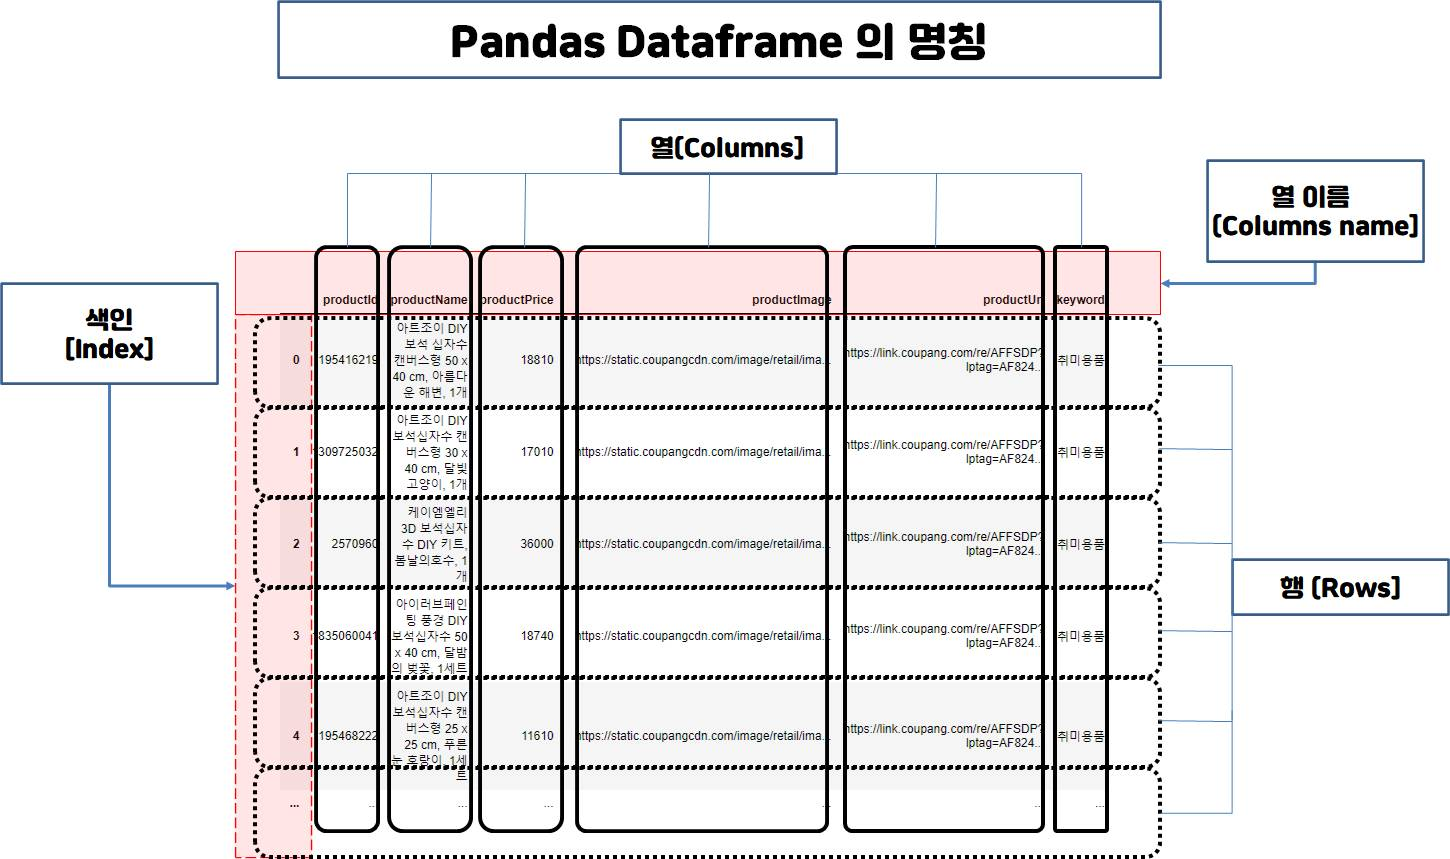

In [ ]:
#리스트
sample_1 = [20,40,60,80]
print(type(sample_1))
print(sample_1[0])
print(sample_1[1])
print(sample_1[2])
print(sample_1[3])
#list는 index를 바꿀 수 없다.
#list는 수식계산으로 합칠수 없다. 요소가 추가될 뿐
sample_1+sample_1

<class 'list'>
20
40
60
80


[20, 40, 60, 80, 20, 40, 60, 80]

In [ ]:
#pandas Series란? 1차원데이터를 활용하기 편한 구조로 파이썬 기본 문법의 리스트와 딕셔너리와 비슷해보이는 구조입니다. 아래의 예시를 통해 배워보겠습니다.
#pandas Series란?
import pandas as pd
sample_2 = pd.Series([20,40,60,80])
print(type(sample_2))
print(sample_2[0])
print(sample_2[1])
print(sample_2[2])
print(sample_2[3])

<class 'pandas.core.series.Series'>
20
40
60
80
<class 'pandas.core.series.Series'>
80
60
40
20
0     40
1     80
2    120
3    160
dtype: int64
0    100
1    100
2    100
3    100
dtype: int64
3     40
2     80
1    120
0    160
dtype: int64


In [ ]:

#Series는 index를 바꿀 수 있다.
sample_3 = pd.Series([20,40,60,80],index=[3,2,1,0])
print(type(sample_3))
print(sample_3[0])
print(sample_3[1])
print(sample_3[2])
print(sample_3[3])

In [ ]:

#Series는 index를 기반으로 수식계산이 가능하다.
print(sample_2+sample_2)
print(sample_2+sample_3)
print(sample_3+sample_3)


In [ ]:
data = data.set_index("행번") #데이터의 행번을 index로 설정한다.
data

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
1   비현코  2019-01-01  70.0  kg   jason  잠실동
2   비현코  2019-03-01  68.0  kg   jason   잠실
3   비현코  2019-06-01   NaN  kg   jason  잠실동
4   비투코  2019-01-01  80.0  kg   jason   잠실
5   비투코  2019-03-01  75.0  kg   jason   잠실
6   비투코  2019-06-01   NaN  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry   강남
8   비사코  2019-03-01   NaN  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data.index

#행 소괄호를 넣지 않는다.

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='행번')

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data.columns
#열 소괄호를 넣지 않는다.

Index(['이름', '조사일', '몸무게', '단위', '트레이너', '지점명'], dtype='object')

In [ ]:
#write your code(백견이 불여일타)


In [ ]:

data.shape
#형태 소괄호를 넣지 않는다.

(9, 6)

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data.head()

이름         조사일   몸무게  단위   트레이너  지점명
행번                                       
1   비현코  2019-01-01  70.0  kg  jason  잠실동
2   비현코  2019-03-01  68.0  kg  jason   잠실
3   비현코  2019-06-01   NaN  kg  jason  잠실동
4   비투코  2019-01-01  80.0  kg  jason   잠실
5   비투코  2019-03-01  75.0  kg  jason   잠실

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data.tail()

이름         조사일   몸무게  단위    트레이너 지점명
행번                                       
5   비투코  2019-03-01  75.0  kg   jason  잠실
6   비투코  2019-06-01   NaN  kg   jason  잠실
7   비사코  2019-01-01  89.0  kg  cherry  강남
8   비사코  2019-03-01   NaN  kg  cherry  강남
9   비사코  2019-06-01  92.0  kg  cherry  강남

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data.head(2)

이름         조사일   몸무게  단위   트레이너  지점명
행번                                       
1   비현코  2019-01-01  70.0  kg  jason  잠실동
2   비현코  2019-03-01  68.0  kg  jason   잠실

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data.head(3)

이름         조사일   몸무게  단위   트레이너  지점명
행번                                       
1   비현코  2019-01-01  70.0  kg  jason  잠실동
2   비현코  2019-03-01  68.0  kg  jason   잠실
3   비현코  2019-06-01   NaN  kg  jason  잠실동

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data.head(10)

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
1   비현코  2019-01-01  70.0  kg   jason  잠실동
2   비현코  2019-03-01  68.0  kg   jason   잠실
3   비현코  2019-06-01   NaN  kg   jason  잠실동
4   비투코  2019-01-01  80.0  kg   jason   잠실
5   비투코  2019-03-01  75.0  kg   jason   잠실
6   비투코  2019-06-01   NaN  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry   강남
8   비사코  2019-03-01   NaN  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data.tail(2)

이름         조사일   몸무게  단위    트레이너 지점명
행번                                       
8   비사코  2019-03-01   NaN  kg  cherry  강남
9   비사코  2019-06-01  92.0  kg  cherry  강남

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data.tail(3)

이름         조사일   몸무게  단위    트레이너 지점명
행번                                       
7   비사코  2019-01-01  89.0  kg  cherry  강남
8   비사코  2019-03-01   NaN  kg  cherry  강남
9   비사코  2019-06-01  92.0  kg  cherry  강남

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
#소괄화를 쓰는 개념은 METHOD 를 사용할때 있는데,  소괄호를 넣지 않은 경우는 특이한 결과다

In [ ]:
data

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
1   비현코  2019-01-01  70.0  kg   jason  잠실동
2   비현코  2019-03-01  68.0  kg   jason   잠실
3   비현코  2019-06-01   NaN  kg   jason  잠실동
4   비투코  2019-01-01  80.0  kg   jason   잠실
5   비투코  2019-03-01  75.0  kg   jason   잠실
6   비투코  2019-06-01   NaN  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry   강남
8   비사코  2019-03-01   NaN  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data["몸무게"].mean()

79.0

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data["몸무게"].min()

68.0

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data["몸무게"].max()

92.0

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data["몸무게"].sum()

474.0

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data["몸무게"].describe()
#기본 통계치

count     6.000000
mean     79.000000
std       9.879271
min      68.000000
25%      71.250000
50%      77.500000
75%      86.750000
max      92.000000
Name: 몸무게, dtype: float64

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
#해당 데이터에서 카테고리별 빈도수 확인
data["지점명"].value_counts()

잠실     4
강남     3
잠실동    2
Name: 지점명, dtype: int64

In [ ]:
#write your code(백견이 불여일타)

#### 2-3. 데이터 조회/검색

##### 2-3-1.열값 조회/검색

In [ ]:
data1 = data.copy()

In [ ]:
data["이름"] #type 을 보면 DataFrame 이 아닌 Series 로 나온다. 여러개의 Series가 모이면 DataFrame이 된다.

행번
1    비현코
2    비현코
3    비현코
4    비투코
5    비투코
6    비투코
7    비사코
8    비사코
9    비사코
Name: 이름, dtype: object

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data[["이름","조사일","몸무게"]]
#컬럼을 2개 가지고 오고 싶으면 2개

이름         조사일   몸무게
행번                       
1   비현코  2019-01-01  70.0
2   비현코  2019-03-01  68.0
3   비현코  2019-06-01   NaN
4   비투코  2019-01-01  80.0
5   비투코  2019-03-01  75.0
6   비투코  2019-06-01   NaN
7   비사코  2019-01-01  89.0
8   비사코  2019-03-01   NaN
9   비사코  2019-06-01  92.0

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
columns= ["이름","조사일","몸무게"]
# LIST를 끌어와야한다.

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data[columns]

이름         조사일   몸무게
행번                       
1   비현코  2019-01-01  70.0
2   비현코  2019-03-01  68.0
3   비현코  2019-06-01   NaN
4   비투코  2019-01-01  80.0
5   비투코  2019-03-01  75.0
6   비투코  2019-06-01   NaN
7   비사코  2019-01-01  89.0
8   비사코  2019-03-01   NaN
9   비사코  2019-06-01  92.0

In [ ]:
#write your code(백견이 불여일타)


- 미션 내가 원하는 컬럼 5개로 구성된 데이터 프레임을 출력해주세요

In [ ]:
#write your code(백견이 불여일타)


##### 2-3-2. row값 조회/검색

In [ ]:
#대신
data.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='행번')

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
list(data.index)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
# loc == locate
#행번1,2,3,4 를 가져온다. 여기서 1,2,3,4는 순서를 의미한다.
data.loc[[1,2,3,4]]

이름         조사일   몸무게  단위   트레이너  지점명
행번                                       
1   비현코  2019-01-01  70.0  kg  jason  잠실동
2   비현코  2019-03-01  68.0  kg  jason   잠실
3   비현코  2019-06-01   NaN  kg  jason  잠실동
4   비투코  2019-01-01  80.0  kg  jason   잠실

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
session_ids = [1,3,7]
data.loc[session_ids]

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
1   비현코  2019-01-01  70.0  kg   jason  잠실동
3   비현코  2019-06-01   NaN  kg   jason  잠실동
7   비사코  2019-01-01  89.0  kg  cherry   강남

In [ ]:
#write your code(백견이 불여일타)


##### 2-3-3. 열(columns)+행(rows) 값 조회/검색

In [ ]:
data.loc[[1,3,7],"이름"]

행번
1    비현코
3    비현코
7    비사코
Name: 이름, dtype: object

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data.loc[[1,3,7],["이름",'조사일','몸무게']]

이름         조사일   몸무게
행번                       
1   비현코  2019-01-01  70.0
3   비현코  2019-06-01   NaN
7   비사코  2019-01-01  89.0

In [ ]:
#write your code(백견이 불여일타)


##### 2-3-4. 조건으로 검색

In [ ]:
data["트레이너"] == "jason"

행번
1     True
2     True
3     True
4     True
5     True
6     True
7    False
8    False
9    False
Name: 트레이너, dtype: bool

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data[data["트레이너"] == "jason"]
#순서상으로 True인 데이터는 살리고 False 인 데이터는 죽인다.

이름         조사일   몸무게  단위   트레이너  지점명
행번                                       
1   비현코  2019-01-01  70.0  kg  jason  잠실동
2   비현코  2019-03-01  68.0  kg  jason   잠실
3   비현코  2019-06-01   NaN  kg  jason  잠실동
4   비투코  2019-01-01  80.0  kg  jason   잠실
5   비투코  2019-03-01  75.0  kg  jason   잠실
6   비투코  2019-06-01   NaN  kg  jason   잠실

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
data[data["몸무게"] < 76]

이름         조사일   몸무게  단위   트레이너  지점명
행번                                       
1   비현코  2019-01-01  70.0  kg  jason  잠실동
2   비현코  2019-03-01  68.0  kg  jason   잠실
5   비투코  2019-03-01  75.0  kg  jason   잠실

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
high = (data["몸무게"] > 75.5)
high

행번
1    False
2    False
3    False
4     True
5    False
6    False
7     True
8    False
9     True
Name: 몸무게, dtype: bool

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
kim =(data["트레이너"] == "cherry")
kim

행번
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
9     True
Name: 트레이너, dtype: bool

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data[high&kim]
#v파이썬에서는 and라고 쓰지만 판다스에서는 & 라고 쓴다

이름         조사일   몸무게  단위    트레이너 지점명
행번                                       
7   비사코  2019-01-01  89.0  kg  cherry  강남
9   비사코  2019-06-01  92.0  kg  cherry  강남

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data [high | kim]
# 파이썬에서는 or이라고 쓰지만 판다스에서는 |( \을 시프트 누루는 것)

이름         조사일   몸무게  단위    트레이너 지점명
행번                                       
4   비투코  2019-01-01  80.0  kg   jason  잠실
7   비사코  2019-01-01  89.0  kg  cherry  강남
8   비사코  2019-03-01   NaN  kg  cherry  강남
9   비사코  2019-06-01  92.0  kg  cherry  강남

In [ ]:
#write your code(백견이 불여일타)


- 미션 몸무게가 80kg이 넘거나 지점명이 잠실지점에 있는 데이터만 출력하세요

In [ ]:
#write your code(백견이 불여일타)


##### 2-3-5.값 정렬



In [ ]:
#결측치 처리 (평균으로 넣어주기)
data['몸무게'].fillna(data['몸무게'].mean(),inplace=True) #몸무게 결측치를 평균몸무게로 채워준다.

In [ ]:
data.sort_values(by='몸무게',ascending=True) #기본 조회 , ascending=False 면 내림차순

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
2   비현코  2019-03-01  68.0  kg   jason   잠실
1   비현코  2019-01-01  70.0  kg   jason  잠실동
5   비투코  2019-03-01  75.0  kg   jason   잠실
3   비현코  2019-06-01  79.0  kg   jason  잠실동
6   비투코  2019-06-01  79.0  kg   jason   잠실
8   비사코  2019-03-01  79.0  kg  cherry   강남
4   비투코  2019-01-01  80.0  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
data.sort_values(by='몸무게',ascending=True,inplace=True) #기본 조회 , ascending=False 면 내림차순, inplace=False 면 데이터저장안됨

#### 2-4. 데이터 생성

In [ ]:
data = data1.copy()#데이터를 편집하기 위해서는 기존의 데이터를 잘 저장해두는 것이 편하다.

##### 2-4-1.결측치 채우기

In [ ]:
data["몸무게"].isnull()

행번
2    False
1    False
5    False
3    False
6    False
8    False
4    False
7    False
9    False
Name: 몸무게, dtype: bool

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
display(data)
data["몸무게"] = data["몸무게"].fillna(75.8)
display(data)

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
2   비현코  2019-03-01  68.0  kg   jason   잠실
1   비현코  2019-01-01  70.0  kg   jason  잠실동
5   비투코  2019-03-01  75.0  kg   jason   잠실
3   비현코  2019-06-01  79.0  kg   jason  잠실동
6   비투코  2019-06-01  79.0  kg   jason   잠실
8   비사코  2019-03-01  79.0  kg  cherry   강남
4   비투코  2019-01-01  80.0  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
2   비현코  2019-03-01  68.0  kg   jason   잠실
1   비현코  2019-01-01  70.0  kg   jason  잠실동
5   비투코  2019-03-01  75.0  kg   jason   잠실
3   비현코  2019-06-01  79.0  kg   jason  잠실동
6   비투코  2019-06-01  79.0  kg   jason   잠실
8   비사코  2019-03-01  79.0  kg  cherry   강남
4   비투코  2019-01-01  80.0  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남

In [ ]:
#write your code(백견이 불여일타)


##### 2-4-2. 열(columns) 값 생성하기

In [ ]:
display(data)
data['몸무게(clean)'] = 75 #단일 값으로 채우기
display(data)
data['몸무게(clean)'] = [1,2,3,4,5,6,7,8,9] #원하는 값으로 채우기
display(data)
# data['몸무게(clean)'] = [1,2,3,4,5,6,7,8,9,10] # 데이터 값의 길이가 일치하지 않으면 오류 발생

이름         조사일   몸무게  단위    트레이너  지점명  몸무게(clean)
행번                                                    
2   비현코  2019-03-01  68.0  kg   jason   잠실           1
1   비현코  2019-01-01  70.0  kg   jason  잠실동           2
5   비투코  2019-03-01  75.0  kg   jason   잠실           3
3   비현코  2019-06-01  79.0  kg   jason  잠실동           4
6   비투코  2019-06-01  79.0  kg   jason   잠실           5
8   비사코  2019-03-01  79.0  kg  cherry   강남           6
4   비투코  2019-01-01  80.0  kg   jason   잠실           7
7   비사코  2019-01-01  89.0  kg  cherry   강남           8
9   비사코  2019-06-01  92.0  kg  cherry   강남           9

이름         조사일   몸무게  단위    트레이너  지점명  몸무게(clean)
행번                                                    
2   비현코  2019-03-01  68.0  kg   jason   잠실          75
1   비현코  2019-01-01  70.0  kg   jason  잠실동          75
5   비투코  2019-03-01  75.0  kg   jason   잠실          75
3   비현코  2019-06-01  79.0  kg   jason  잠실동          75
6   비투코  2019-06-01  79.0  kg   jason   잠실          75
8   비사코  2019-03-01  79.0  kg  cherry   강남          75
4   비투코  2019-01-01  80.0  kg   jason   잠실          75
7   비사코  2019-01-01  89.0  kg  cherry   강남          75
9   비사코  2019-06-01  92.0  kg  cherry   강남          75

이름         조사일   몸무게  단위    트레이너  지점명  몸무게(clean)
행번                                                    
2   비현코  2019-03-01  68.0  kg   jason   잠실           1
1   비현코  2019-01-01  70.0  kg   jason  잠실동           2
5   비투코  2019-03-01  75.0  kg   jason   잠실           3
3   비현코  2019-06-01  79.0  kg   jason  잠실동           4
6   비투코  2019-06-01  79.0  kg   jason   잠실           5
8   비사코  2019-03-01  79.0  kg  cherry   강남           6
4   비투코  2019-01-01  80.0  kg   jason   잠실           7
7   비사코  2019-01-01  89.0  kg  cherry   강남           8
9   비사코  2019-06-01  92.0  kg  cherry   강남           9

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
display(data)
data["몸무게(prev+1)"] = data["몸무게"].shift(+1)
data["몸무게(next-1)"] = data["몸무게"].shift(-1)
display(data)

이름         조사일   몸무게  단위    트레이너  지점명  몸무게(clean)
행번                                                    
2   비현코  2019-03-01  68.0  kg   jason   잠실           1
1   비현코  2019-01-01  70.0  kg   jason  잠실동           2
5   비투코  2019-03-01  75.0  kg   jason   잠실           3
3   비현코  2019-06-01  79.0  kg   jason  잠실동           4
6   비투코  2019-06-01  79.0  kg   jason   잠실           5
8   비사코  2019-03-01  79.0  kg  cherry   강남           6
4   비투코  2019-01-01  80.0  kg   jason   잠실           7
7   비사코  2019-01-01  89.0  kg  cherry   강남           8
9   비사코  2019-06-01  92.0  kg  cherry   강남           9

이름         조사일   몸무게  단위    트레이너  지점명  몸무게(clean)  몸무게(prev+1)  \
행번                                                                    
2   비현코  2019-03-01  68.0  kg   jason   잠실           1          NaN   
1   비현코  2019-01-01  70.0  kg   jason  잠실동           2         68.0   
5   비투코  2019-03-01  75.0  kg   jason   잠실           3         70.0   
3   비현코  2019-06-01  79.0  kg   jason  잠실동           4         75.0   
6   비투코  2019-06-01  79.0  kg   jason   잠실           5         79.0   
8   비사코  2019-03-01  79.0  kg  cherry   강남           6         79.0   
4   비투코  2019-01-01  80.0  kg   jason   잠실           7         79.0   
7   비사코  2019-01-01  89.0  kg  cherry   강남           8         80.0   
9   비사코  2019-06-01  92.0  kg  cherry   강남           9         89.0   

    몸무게(next-1)  
행번               
2          70.0  
1          75.0  
5          79.0  
3          79.0  
6          79.0  
8          80.0  
4          89.0  
7          92.0  
9           NaN

In [ ]:
#write your code(백견이 불여일타)


##### 2-4-3. 행(row) 값 생성하기

In [ ]:
display(data)
data.loc[10] = 0 #row값을 모두 하나의 값으로 변환처리가 가능하다.
display(data)
data.loc[10] = [1,2,3,4,5,6,7,8,9] #row값의 길이만큼 데이터를 입력하면 데이터가 추가된다.
display(data)
# data.loc[10] = [1,2,3,4,5,6,7,8] # 데이터 값의 길이가 일치하지 않으면 오류 발생


이름         조사일   몸무게  단위    트레이너  지점명  몸무게(clean)  몸무게(prev+1)  \
행번                                                                    
2   비현코  2019-03-01  68.0  kg   jason   잠실           1          NaN   
1   비현코  2019-01-01  70.0  kg   jason  잠실동           2         68.0   
5   비투코  2019-03-01  75.0  kg   jason   잠실           3         70.0   
3   비현코  2019-06-01  79.0  kg   jason  잠실동           4         75.0   
6   비투코  2019-06-01  79.0  kg   jason   잠실           5         79.0   
8   비사코  2019-03-01  79.0  kg  cherry   강남           6         79.0   
4   비투코  2019-01-01  80.0  kg   jason   잠실           7         79.0   
7   비사코  2019-01-01  89.0  kg  cherry   강남           8         80.0   
9   비사코  2019-06-01  92.0  kg  cherry   강남           9         89.0   

    몸무게(next-1)  
행번               
2          70.0  
1          75.0  
5          79.0  
3          79.0  
6          79.0  
8          80.0  
4          89.0  
7          92.0  
9           NaN

이름         조사일   몸무게  단위    트레이너  지점명  몸무게(clean)  몸무게(prev+1)  \
행번                                                                    
2   비현코  2019-03-01  68.0  kg   jason   잠실           1          NaN   
1   비현코  2019-01-01  70.0  kg   jason  잠실동           2         68.0   
5   비투코  2019-03-01  75.0  kg   jason   잠실           3         70.0   
3   비현코  2019-06-01  79.0  kg   jason  잠실동           4         75.0   
6   비투코  2019-06-01  79.0  kg   jason   잠실           5         79.0   
8   비사코  2019-03-01  79.0  kg  cherry   강남           6         79.0   
4   비투코  2019-01-01  80.0  kg   jason   잠실           7         79.0   
7   비사코  2019-01-01  89.0  kg  cherry   강남           8         80.0   
9   비사코  2019-06-01  92.0  kg  cherry   강남           9         89.0   
10    0           0   0.0   0       0    0           0          0.0   

    몸무게(next-1)  
행번               
2          70.0  
1          75.0  
5          79.0  
3          79.0  
6          79.0  
8          80.0  
4          89.0  
7          92.0  
9           NaN  
10          0.0

이름         조사일   몸무게  단위    트레이너  지점명  몸무게(clean)  몸무게(prev+1)  \
행번                                                                    
2   비현코  2019-03-01  68.0  kg   jason   잠실           1          NaN   
1   비현코  2019-01-01  70.0  kg   jason  잠실동           2         68.0   
5   비투코  2019-03-01  75.0  kg   jason   잠실           3         70.0   
3   비현코  2019-06-01  79.0  kg   jason  잠실동           4         75.0   
6   비투코  2019-06-01  79.0  kg   jason   잠실           5         79.0   
8   비사코  2019-03-01  79.0  kg  cherry   강남           6         79.0   
4   비투코  2019-01-01  80.0  kg   jason   잠실           7         79.0   
7   비사코  2019-01-01  89.0  kg  cherry   강남           8         80.0   
9   비사코  2019-06-01  92.0  kg  cherry   강남           9         89.0   
10    1           2   3.0   4       5    6           7          8.0   

    몸무게(next-1)  
행번               
2          70.0  
1          75.0  
5          79.0  
3          79.0  
6          79.0  
8          80.0  
4          89.0  
7          92.0  
9           NaN  
10          9.0

#### 2-5. 데이터 수정

추가와 수정은 동일하다

In [ ]:
data = data1.copy()

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
display(data)
data["지역명"] = "수도권"
display(data)

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
2   비현코  2019-03-01  68.0  kg   jason   잠실
1   비현코  2019-01-01  70.0  kg   jason  잠실동
5   비투코  2019-03-01  75.0  kg   jason   잠실
3   비현코  2019-06-01  79.0  kg   jason  잠실동
6   비투코  2019-06-01  79.0  kg   jason   잠실
8   비사코  2019-03-01  79.0  kg  cherry   강남
4   비투코  2019-01-01  80.0  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남

이름         조사일   몸무게  단위    트레이너  지점명  지역명
행번                                             
2   비현코  2019-03-01  68.0  kg   jason   잠실  수도권
1   비현코  2019-01-01  70.0  kg   jason  잠실동  수도권
5   비투코  2019-03-01  75.0  kg   jason   잠실  수도권
3   비현코  2019-06-01  79.0  kg   jason  잠실동  수도권
6   비투코  2019-06-01  79.0  kg   jason   잠실  수도권
8   비사코  2019-03-01  79.0  kg  cherry   강남  수도권
4   비투코  2019-01-01  80.0  kg   jason   잠실  수도권
7   비사코  2019-01-01  89.0  kg  cherry   강남  수도권
9   비사코  2019-06-01  92.0  kg  cherry   강남  수도권

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
display(data)
data["지역명"] = "서울"
display(data)

이름         조사일   몸무게  단위    트레이너  지점명  지역명
행번                                             
2   비현코  2019-03-01  68.0  kg   jason   잠실  수도권
1   비현코  2019-01-01  70.0  kg   jason  잠실동  수도권
5   비투코  2019-03-01  75.0  kg   jason   잠실  수도권
3   비현코  2019-06-01  79.0  kg   jason  잠실동  수도권
6   비투코  2019-06-01  79.0  kg   jason   잠실  수도권
8   비사코  2019-03-01  79.0  kg  cherry   강남  수도권
4   비투코  2019-01-01  80.0  kg   jason   잠실  수도권
7   비사코  2019-01-01  89.0  kg  cherry   강남  수도권
9   비사코  2019-06-01  92.0  kg  cherry   강남  수도권

이름         조사일   몸무게  단위    트레이너  지점명 지역명
행번                                            
2   비현코  2019-03-01  68.0  kg   jason   잠실  서울
1   비현코  2019-01-01  70.0  kg   jason  잠실동  서울
5   비투코  2019-03-01  75.0  kg   jason   잠실  서울
3   비현코  2019-06-01  79.0  kg   jason  잠실동  서울
6   비투코  2019-06-01  79.0  kg   jason   잠실  서울
8   비사코  2019-03-01  79.0  kg  cherry   강남  서울
4   비투코  2019-01-01  80.0  kg   jason   잠실  서울
7   비사코  2019-01-01  89.0  kg  cherry   강남  서울
9   비사코  2019-06-01  92.0  kg  cherry   강남  서울

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
#행번 5의 결제 열 값만 5를 10으로 변경하기
display(data)
data.loc[5,'지역명'] = 10
display(data)

이름         조사일   몸무게  단위    트레이너  지점명 지역명
행번                                            
2   비현코  2019-03-01  68.0  kg   jason   잠실  서울
1   비현코  2019-01-01  70.0  kg   jason  잠실동  서울
5   비투코  2019-03-01  75.0  kg   jason   잠실  서울
3   비현코  2019-06-01  79.0  kg   jason  잠실동  서울
6   비투코  2019-06-01  79.0  kg   jason   잠실  서울
8   비사코  2019-03-01  79.0  kg  cherry   강남  서울
4   비투코  2019-01-01  80.0  kg   jason   잠실  서울
7   비사코  2019-01-01  89.0  kg  cherry   강남  서울
9   비사코  2019-06-01  92.0  kg  cherry   강남  서울

이름         조사일   몸무게  단위    트레이너  지점명 지역명
행번                                            
2   비현코  2019-03-01  68.0  kg   jason   잠실  서울
1   비현코  2019-01-01  70.0  kg   jason  잠실동  서울
5   비투코  2019-03-01  75.0  kg   jason   잠실  10
3   비현코  2019-06-01  79.0  kg   jason  잠실동  서울
6   비투코  2019-06-01  79.0  kg   jason   잠실  서울
8   비사코  2019-03-01  79.0  kg  cherry   강남  서울
4   비투코  2019-01-01  80.0  kg   jason   잠실  서울
7   비사코  2019-01-01  89.0  kg  cherry   강남  서울
9   비사코  2019-06-01  92.0  kg  cherry   강남  서울

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
display(data)
data["과체중"] = data["몸무게"] >75.8
display(data)

이름         조사일   몸무게  단위    트레이너  지점명 지역명
행번                                            
2   비현코  2019-03-01  68.0  kg   jason   잠실  서울
1   비현코  2019-01-01  70.0  kg   jason  잠실동  서울
5   비투코  2019-03-01  75.0  kg   jason   잠실  10
3   비현코  2019-06-01  79.0  kg   jason  잠실동  서울
6   비투코  2019-06-01  79.0  kg   jason   잠실  서울
8   비사코  2019-03-01  79.0  kg  cherry   강남  서울
4   비투코  2019-01-01  80.0  kg   jason   잠실  서울
7   비사코  2019-01-01  89.0  kg  cherry   강남  서울
9   비사코  2019-06-01  92.0  kg  cherry   강남  서울

이름         조사일   몸무게  단위    트레이너  지점명 지역명    과체중
행번                                                   
2   비현코  2019-03-01  68.0  kg   jason   잠실  서울  False
1   비현코  2019-01-01  70.0  kg   jason  잠실동  서울  False
5   비투코  2019-03-01  75.0  kg   jason   잠실  10  False
3   비현코  2019-06-01  79.0  kg   jason  잠실동  서울   True
6   비투코  2019-06-01  79.0  kg   jason   잠실  서울   True
8   비사코  2019-03-01  79.0  kg  cherry   강남  서울   True
4   비투코  2019-01-01  80.0  kg   jason   잠실  서울   True
7   비사코  2019-01-01  89.0  kg  cherry   강남  서울   True
9   비사코  2019-06-01  92.0  kg  cherry   강남  서울   True

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
data.loc[data["몸무게"]>75.8 , "상태"] = "과체중"
data.loc[data["몸무게"]<75.8 , "상태"] = "정상"
data

이름         조사일   몸무게  단위    트레이너  지점명 지역명    과체중   상태
행번                                                        
2   비현코  2019-03-01  68.0  kg   jason   잠실  서울  False   정상
1   비현코  2019-01-01  70.0  kg   jason  잠실동  서울  False   정상
5   비투코  2019-03-01  75.0  kg   jason   잠실  10  False   정상
3   비현코  2019-06-01  79.0  kg   jason  잠실동  서울   True  과체중
6   비투코  2019-06-01  79.0  kg   jason   잠실  서울   True  과체중
8   비사코  2019-03-01  79.0  kg  cherry   강남  서울   True  과체중
4   비투코  2019-01-01  80.0  kg   jason   잠실  서울   True  과체중
7   비사코  2019-01-01  89.0  kg  cherry   강남  서울   True  과체중
9   비사코  2019-06-01  92.0  kg  cherry   강남  서울   True  과체중

In [ ]:
#write your code(백견이 불여일타)


#### 2-6. 데이터 삭제

In [ ]:
import pandas as pd
import numpy as np

raw_data = {'행번': [1, 2, 3, 4,5,6,7,8,9,10,11,12],
            '이름': ['비현코','비현코','비현코','비투코','비투코','비투코','비사코','비사코','비사코','비부코','비부코','비부코'],
            '조사일': ['2019-01-01','2019-03-01','2019-06-01','2019-01-01','2019-03-01','2019-06-01','2019-01-01','2019-03-01','2019-06-01','2019-01-01','2019-03-01','2019-06-01'],
            '몸무게': [70,68,np.nan,80,75,np.nan,89,np.nan,92,50,52,55],
            '단위': ['kg','kg','kg','kg','kg','kg','kg','kg','kg','kg','kg','kg'],
            '트레이너': ['jason','jason','jason','jason','jason','jason','cherry','cherry','cherry','juno','juno','juno'],
            '지점명': ["잠실","잠실","종각","잠실","잠실","잠실","여의도","강남","강남","잠실","잠실","여의도"]
           }

data_raw = pd.DataFrame(raw_data)
data_raw = data_raw.set_index("행번")
data_raw
data= data_raw.copy()

In [ ]:
#row를 지우는 방법
display(data)
data.drop(1,axis = "index",inplace=True) #(index가 1인 데이터를 삭제-1,axis = "index"), (data에 바로 반영하라-inplace=True)
display(data)

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
1   비현코  2019-01-01  70.0  kg   jason   잠실
2   비현코  2019-03-01  68.0  kg   jason   잠실
3   비현코  2019-06-01   NaN  kg   jason   종각
4   비투코  2019-01-01  80.0  kg   jason   잠실
5   비투코  2019-03-01  75.0  kg   jason   잠실
6   비투코  2019-06-01   NaN  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry  여의도
8   비사코  2019-03-01   NaN  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남
10  비부코  2019-01-01  50.0  kg    juno   잠실
11  비부코  2019-03-01  52.0  kg    juno   잠실
12  비부코  2019-06-01  55.0  kg    juno  여의도

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
2   비현코  2019-03-01  68.0  kg   jason   잠실
3   비현코  2019-06-01   NaN  kg   jason   종각
4   비투코  2019-01-01  80.0  kg   jason   잠실
5   비투코  2019-03-01  75.0  kg   jason   잠실
6   비투코  2019-06-01   NaN  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry  여의도
8   비사코  2019-03-01   NaN  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남
10  비부코  2019-01-01  50.0  kg    juno   잠실
11  비부코  2019-03-01  52.0  kg    juno   잠실
12  비부코  2019-06-01  55.0  kg    juno  여의도

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
#row를 지우는 방법
data= data_raw.copy()
display(data)
data.drop([1,4,7],axis = "index",inplace=True)
display(data)

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
1   비현코  2019-01-01  70.0  kg   jason   잠실
2   비현코  2019-03-01  68.0  kg   jason   잠실
3   비현코  2019-06-01   NaN  kg   jason   종각
4   비투코  2019-01-01  80.0  kg   jason   잠실
5   비투코  2019-03-01  75.0  kg   jason   잠실
6   비투코  2019-06-01   NaN  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry  여의도
8   비사코  2019-03-01   NaN  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남
10  비부코  2019-01-01  50.0  kg    juno   잠실
11  비부코  2019-03-01  52.0  kg    juno   잠실
12  비부코  2019-06-01  55.0  kg    juno  여의도

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
2   비현코  2019-03-01  68.0  kg   jason   잠실
3   비현코  2019-06-01   NaN  kg   jason   종각
5   비투코  2019-03-01  75.0  kg   jason   잠실
6   비투코  2019-06-01   NaN  kg   jason   잠실
8   비사코  2019-03-01   NaN  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남
10  비부코  2019-01-01  50.0  kg    juno   잠실
11  비부코  2019-03-01  52.0  kg    juno   잠실
12  비부코  2019-06-01  55.0  kg    juno  여의도

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
#columns을 지우는 방법
display(data)
data.drop('지점명',axis = "columns",inplace=True)
display(data)

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
2   비현코  2019-03-01  68.0  kg   jason   잠실
3   비현코  2019-06-01   NaN  kg   jason   종각
5   비투코  2019-03-01  75.0  kg   jason   잠실
6   비투코  2019-06-01   NaN  kg   jason   잠실
8   비사코  2019-03-01   NaN  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남
10  비부코  2019-01-01  50.0  kg    juno   잠실
11  비부코  2019-03-01  52.0  kg    juno   잠실
12  비부코  2019-06-01  55.0  kg    juno  여의도

이름         조사일   몸무게  단위    트레이너
행번                                   
2   비현코  2019-03-01  68.0  kg   jason
3   비현코  2019-06-01   NaN  kg   jason
5   비투코  2019-03-01  75.0  kg   jason
6   비투코  2019-06-01   NaN  kg   jason
8   비사코  2019-03-01   NaN  kg  cherry
9   비사코  2019-06-01  92.0  kg  cherry
10  비부코  2019-01-01  50.0  kg    juno
11  비부코  2019-03-01  52.0  kg    juno
12  비부코  2019-06-01  55.0  kg    juno

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
#만약 여러개를 지우고 싶다면 LIST로 넣을수있음
data= data_raw.copy()
display(data)
data.drop(["트레이너","지점명"],axis = "columns",inplace=True)
display(data)

이름         조사일   몸무게  단위    트레이너  지점명
행번                                        
1   비현코  2019-01-01  70.0  kg   jason   잠실
2   비현코  2019-03-01  68.0  kg   jason   잠실
3   비현코  2019-06-01   NaN  kg   jason   종각
4   비투코  2019-01-01  80.0  kg   jason   잠실
5   비투코  2019-03-01  75.0  kg   jason   잠실
6   비투코  2019-06-01   NaN  kg   jason   잠실
7   비사코  2019-01-01  89.0  kg  cherry  여의도
8   비사코  2019-03-01   NaN  kg  cherry   강남
9   비사코  2019-06-01  92.0  kg  cherry   강남
10  비부코  2019-01-01  50.0  kg    juno   잠실
11  비부코  2019-03-01  52.0  kg    juno   잠실
12  비부코  2019-06-01  55.0  kg    juno  여의도

이름         조사일   몸무게  단위
행번                           
1   비현코  2019-01-01  70.0  kg
2   비현코  2019-03-01  68.0  kg
3   비현코  2019-06-01   NaN  kg
4   비투코  2019-01-01  80.0  kg
5   비투코  2019-03-01  75.0  kg
6   비투코  2019-06-01   NaN  kg
7   비사코  2019-01-01  89.0  kg
8   비사코  2019-03-01   NaN  kg
9   비사코  2019-06-01  92.0  kg
10  비부코  2019-01-01  50.0  kg
11  비부코  2019-03-01  52.0  kg
12  비부코  2019-06-01  55.0  kg

In [ ]:
#write your code(백견이 불여일타)


#### 2-7. 데이터 요약본 제작

##### 2-7-1.피봇테이블


In [ ]:
data= data_raw.copy()

In [ ]:
pd.pivot_table(data,index="트레이너",values ="몸무게")

몸무게
트레이너             
cherry  90.500000
jason   73.250000
juno    52.333333

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
pd.pivot_table(data,index=["지점명","트레이너"],values ="몸무게")  #aggi

몸무게
지점명 트레이너         
강남  cherry  92.00
여의도 cherry  89.00
    juno    55.00
잠실  jason   73.25
    juno    51.00

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
pd.pivot_table(data,index=["지점명","트레이너"],values ="몸무게", aggfunc = "sum" )  #기본은 평균


몸무게
지점명 트레이너         
강남  cherry   92.0
여의도 cherry   89.0
    juno     55.0
잠실  jason   293.0
    juno    102.0
종각  jason     0.0

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
pd.pivot_table(data,index=["지점명","트레이너"],values ="몸무게", aggfunc = ["sum","mean"] ) #합계&평균

sum   mean
              몸무게    몸무게
지점명 트레이너                
강남  cherry   92.0  92.00
여의도 cherry   89.0  89.00
    juno     55.0  55.00
잠실  jason   293.0  73.25
    juno    102.0  51.00
종각  jason     0.0    NaN

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
# pd.pivot_table(data,index=["지점명","트레이너"],values ="몸무게", aggfunc = "sum","mean" ) #해당방식으로 활용은 불가능하다

In [ ]:
#write your code(백견이 불여일타)


In [ ]:
data['몸무게(prev)'] = data['몸무게'].shift(-1)
pd.pivot_table(data,index=["지점명","트레이너"],values =["몸무게","몸무게(prev)"], aggfunc = ["mean","sum"] )

mean               sum          
              몸무게  몸무게(prev)    몸무게 몸무게(prev)
지점명 트레이너                                     
강남  cherry  92.00  71.000000   92.0     142.0
여의도 cherry  89.00        NaN   89.0       0.0
    juno    55.00        NaN   55.0       0.0
잠실  jason   73.25  77.333333  293.0     232.0
    juno    51.00  53.500000  102.0     107.0
종각  jason     NaN  80.000000    0.0      80.0

In [ ]:
#write your code(백견이 불여일타)

##### 2-7-2.데이터 합치기 -concat

In [ ]:
#합치기 concat
data246 = data.loc[[2,4,6]]
data246

이름         조사일   몸무게  단위   트레이너 지점명  몸무게(prev)
행번                                                 
2   비현코  2019-03-01  68.0  kg  jason  잠실        NaN
4   비투코  2019-01-01  80.0  kg  jason  잠실       75.0
6   비투코  2019-06-01   NaN  kg  jason  잠실       89.0

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
#합치기 concat
data389 = data.loc[[3,8,9]]
data389

이름         조사일   몸무게  단위    트레이너 지점명  몸무게(prev)
행번                                                  
3   비현코  2019-06-01   NaN  kg   jason  종각       80.0
8   비사코  2019-03-01   NaN  kg  cherry  강남       92.0
9   비사코  2019-06-01  92.0  kg  cherry  강남       50.0

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
pd.concat([data246,data389],axis=0) # 세로 합치기

이름         조사일   몸무게  단위    트레이너 지점명  몸무게(prev)
행번                                                  
2   비현코  2019-03-01  68.0  kg   jason  잠실        NaN
4   비투코  2019-01-01  80.0  kg   jason  잠실       75.0
6   비투코  2019-06-01   NaN  kg   jason  잠실       89.0
3   비현코  2019-06-01   NaN  kg   jason  종각       80.0
8   비사코  2019-03-01   NaN  kg  cherry  강남       92.0
9   비사코  2019-06-01  92.0  kg  cherry  강남       50.0

In [ ]:
#write your code(백견이 불여일타)

In [ ]:
pd.concat([data246,data389],axis=1) # 가로 합치기

이름         조사일   몸무게   단위   트레이너  지점명  몸무게(prev)   이름         조사일   몸무게  \
행번                                                                             
2   비현코  2019-03-01  68.0   kg  jason   잠실        NaN  NaN         NaN   NaN   
3   NaN         NaN   NaN  NaN    NaN  NaN        NaN  비현코  2019-06-01   NaN   
4   비투코  2019-01-01  80.0   kg  jason   잠실       75.0  NaN         NaN   NaN   
6   비투코  2019-06-01   NaN   kg  jason   잠실       89.0  NaN         NaN   NaN   
8   NaN         NaN   NaN  NaN    NaN  NaN        NaN  비사코  2019-03-01   NaN   
9   NaN         NaN   NaN  NaN    NaN  NaN        NaN  비사코  2019-06-01  92.0   

     단위    트레이너  지점명  몸무게(prev)  
행번                               
2   NaN     NaN  NaN        NaN  
3    kg   jason   종각       80.0  
4   NaN     NaN  NaN        NaN  
6   NaN     NaN  NaN        NaN  
8    kg  cherry   강남       92.0  
9    kg  cherry   강남       50.0

In [ ]:
#write your code(백견이 불여일타)

### 2-7-3. 다양한 엑셀데이터 하나로 합치기

### 데이터결합(Join)

In [ ]:
#데이터 기초
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# A 데이터
A_data = {
    'key': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'] + ['C'+str(i) for i in range(1, 11)],
    'value_A': np.random.randint(1, 100, 20)
}

# B 데이터
B_data = {
    'key': ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10'] + ['C'+str(i) for i in range(1, 11)],
    'value_B': np.random.randint(1, 100, 20)
}

A = pd.DataFrame(A_data)
B = pd.DataFrame(B_data)

display(A)
display(B)


key  value_A
0    A1       33
1    A2       71
2    A3       86
3    A4       32
4    A5       14
5    A6       72
6    A7       57
7    A8       25
8    A9       80
9   A10       42
10   C1       19
11   C2       41
12   C3       55
13   C4       80
14   C5       12
15   C6       39
16   C7       94
17   C8        2
18   C9       96
19  C10       45

key  value_B
0    B1       89
1    B2       25
2    B3       68
3    B4       83
4    B5        4
5    B6       77
6    B7       36
7    B8       87
8    B9       62
9   B10       70
10   C1       88
11   C2       44
12   C3       33
13   C4       12
14   C5       85
15   C6       11
16   C7       55
17   C8       38
18   C9       29
19  C10        3

#### inner Join

key  value_A  value_B
0   C1       19       88
1   C2       41       44
2   C3       55       33
3   C4       80       12
4   C5       12       85
5   C6       39       11
6   C7       94       55
7   C8        2       38
8   C9       96       29
9  C10       45        3

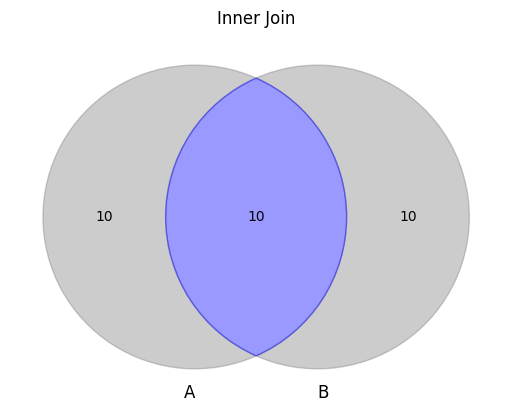

In [ ]:
inner_join = A.merge(B, how='inner', on='key')
display(inner_join)

# 벤 다이어그램 시각화
venn = venn2(subsets=(10, 10, 10), set_labels=('A', 'B'))
venn.get_patch_by_id('10').set_color('gray') # A - B 부분
venn.get_patch_by_id('01').set_color('gray') # B - A 부분
venn.get_patch_by_id('11').set_color('blue') # 교집합 부분
plt.title('Inner Join')
plt.show()


#### Left Join


key  value_A  value_B
0    A1       33      NaN
1    A2       71      NaN
2    A3       86      NaN
3    A4       32      NaN
4    A5       14      NaN
5    A6       72      NaN
6    A7       57      NaN
7    A8       25      NaN
8    A9       80      NaN
9   A10       42      NaN
10   C1       19     88.0
11   C2       41     44.0
12   C3       55     33.0
13   C4       80     12.0
14   C5       12     85.0
15   C6       39     11.0
16   C7       94     55.0
17   C8        2     38.0
18   C9       96     29.0
19  C10       45      3.0

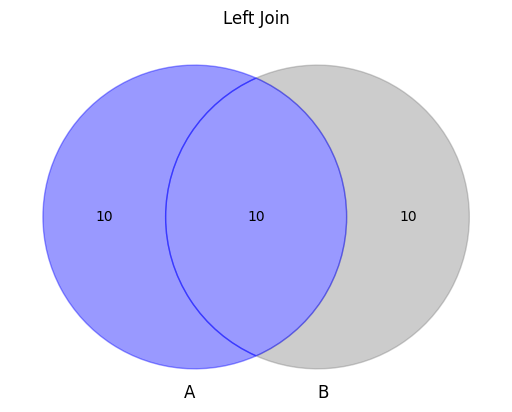

In [ ]:
left_join = A.merge(B, how='left', on='key')
display(left_join)

venn = venn2(subsets=(10, 10, 10), set_labels=('A', 'B'))
venn.get_patch_by_id('10').set_color('blue')
venn.get_patch_by_id('01').set_color('gray')
venn.get_patch_by_id('11').set_color('blue')
plt.title('Left Join')
plt.show()


#### right Join


key  value_A  value_B
0    B1      NaN       89
1    B2      NaN       25
2    B3      NaN       68
3    B4      NaN       83
4    B5      NaN        4
5    B6      NaN       77
6    B7      NaN       36
7    B8      NaN       87
8    B9      NaN       62
9   B10      NaN       70
10   C1     19.0       88
11   C2     41.0       44
12   C3     55.0       33
13   C4     80.0       12
14   C5     12.0       85
15   C6     39.0       11
16   C7     94.0       55
17   C8      2.0       38
18   C9     96.0       29
19  C10     45.0        3

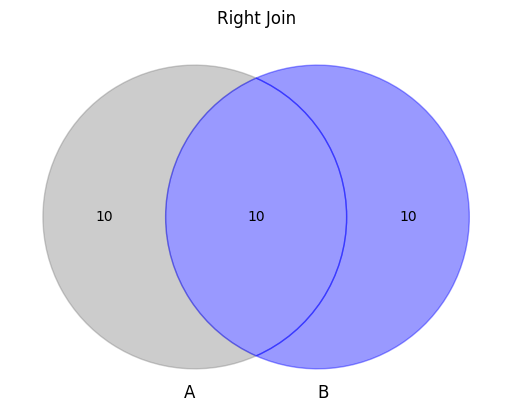

In [ ]:
right_join = A.merge(B, how='right', on='key')
display(right_join)

venn = venn2(subsets=(10, 10, 10), set_labels=('A', 'B'))
venn.get_patch_by_id('10').set_color('gray')
venn.get_patch_by_id('01').set_color('blue')
venn.get_patch_by_id('11').set_color('blue')
plt.title('Right Join')
plt.show()


#### outer Join


key  value_A  value_B
0    A1     33.0      NaN
1    A2     71.0      NaN
2    A3     86.0      NaN
3    A4     32.0      NaN
4    A5     14.0      NaN
5    A6     72.0      NaN
6    A7     57.0      NaN
7    A8     25.0      NaN
8    A9     80.0      NaN
9   A10     42.0      NaN
10   C1     19.0     88.0
11   C2     41.0     44.0
12   C3     55.0     33.0
13   C4     80.0     12.0
14   C5     12.0     85.0
15   C6     39.0     11.0
16   C7     94.0     55.0
17   C8      2.0     38.0
18   C9     96.0     29.0
19  C10     45.0      3.0
20   B1      NaN     89.0
21   B2      NaN     25.0
22   B3      NaN     68.0
23   B4      NaN     83.0
24   B5      NaN      4.0
25   B6      NaN     77.0
26   B7      NaN     36.0
27   B8      NaN     87.0
28   B9      NaN     62.0
29  B10      NaN     70.0

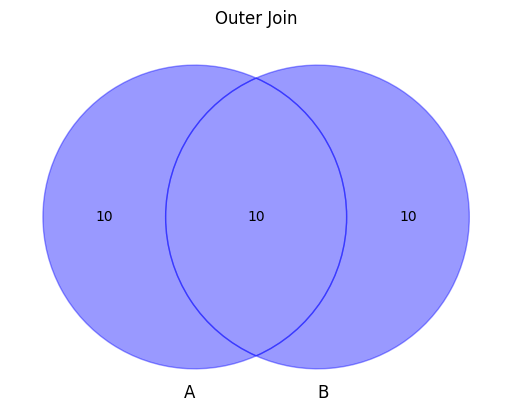

In [ ]:
outer_join = A.merge(B, how='outer', on='key')
display(outer_join)

venn = venn2(subsets=(10, 10, 10), set_labels=('A', 'B'))
venn.get_patch_by_id('10').set_color('blue')
venn.get_patch_by_id('01').set_color('blue')
venn.get_patch_by_id('11').set_color('blue')
plt.title('Outer Join')
plt.show()


# 3.**현업적용사례**

In [ ]:
#1 필요한 라이브러리 설치하기
import pandas as pd
import os

In [ ]:
#write your code()

In [ ]:
#2 엑셀취합자료의 자료 가져오기
file_list = os.listdir("./new_data2")#new_data -한글 / new_data2 - 영어
file_list_xls = []
for a in file_list:
    if ".xls" in a:
        file_list_xls.append(a)

In [ ]:
#write your code()

In [ ]:
#3.각각의 엑셀파일을 편집후와 함께 저장한다.

data_unit_sum = pd.DataFrame()
for b in file_list_xls:
    df = pd.read_excel("./new_data2/"+b) #new_data -한글 / new_data2 - 영어
    df['나라'] = b.split("_")[1]
    data_unit = df[['나라','조사제품','제목','내용']]
    data_unit_sum = pd.concat([data_unit_sum, data_unit], axis = 0)
    display(data_unit_sum)
data_unit_sum.to_excel('combined_excel.xlsx')

나라     조사제품                                                 제목  \
0  china  battery        'Green stocks are China's next tech stocks'   
1  china  battery  [ANALYSIS] Korean exporters start rethinking '...   
2  china  battery  Red Flags for Forced Labor Found in China’s Ca...   
3  china  battery      Battery maker seizes new energy opportunities   
4  china  battery               (4th LD) S Korea-China-defense talks   
5  china  battery  Korean battery makers look over shoulder as Ch...   
6  china  battery  S. Korea’s export boom through China coming to...   
7  china  battery  S. Korea ranks second in global secondary batt...   
8  china  battery  Korean battery majors ramp up next-gen cylindr...   

                                                  내용  
0  He also referred to an ecosystem in China's EV...  
1  It also houses the world's leading battery man...  
2  To understand how reliant the battery industry...  
3  It became the fourth global Tier One electric ...  
4  defense battery in South Korea. Lee defended i...  
5  South Korean battery makers keep lead in globa...  
6  through China that South Korea has enjoyed ove...  
7  South Korea ranked second in the secondary bat...  
8  cylindrical battery factory in Arizona, the Un...

나라        조사제품                                                 제목  \
0    china     battery        'Green stocks are China's next tech stocks'   
1    china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china     battery      Battery maker seizes new energy opportunities   
4    china     battery               (4th LD) S Korea-China-defense talks   
5    china     battery  Korean battery makers look over shoulder as Ch...   
6    china     battery  S. Korea’s export boom through China coming to...   
7    china     battery  S. Korea ranks second in global secondary batt...   
8    china     battery  Korean battery majors ramp up next-gen cylindr...   
0  england  automobile  A Classic New England Rally Is Revived, Minus ...   
1  england  automobile  The Novelist Who Saw Middle America as It Real...   
2  england  automobile  Why a Rhodes Scholar’s Ambition Led Her to a J...   
3  england  automobile  [K-Biz brief] 'Chinese version Tesla' Byton se...   
4  england  automobile                                  FILE BRITAIN SAAB   
5  england  automobile  Domestic Automobile Consumption Ranks 13th for...   
6  england  automobile  One Weekend in Vegas With the Nation’s Auto De...   
7  england  automobile      Boom and Bust History in Britain’s Motor City   
8  england  automobile                  Red flags flying all around (KOR)   
9  england  automobile  More Women Muscle In on the World of Vintage Cars   

                                                  내용  
0  He also referred to an ecosystem in China's EV...  
1  It also houses the world's leading battery man...  
2  To understand how reliant the battery industry...  
3  It became the fourth global Tier One electric ...  
4  defense battery in South Korea. Lee defended i...  
5  South Korean battery makers keep lead in globa...  
6  through China that South Korea has enjoyed ove...  
7  South Korea ranked second in the secondary bat...  
8  cylindrical battery factory in Arizona, the Un...  
0  Rallye Automobile Endurance Run. The rally (ca...  
1  “To see Dorothy,” he said.) When she finally s...  
2  Oxford, England. Many students seek the schola...  
3  It was also selected as the'Summer SUV of the ...  
4  GM agrees Saab sale to Koenigsegg (FILE) A fil...  
5  Domestic automobile consumption was revealed t...  
6  The last time the National Automobile Dealers ...  
7  COVENTRY, England — Coventry in the English Mi...  
8  At the peak of steam engine-powered automobile...  
9  The survey covered 1,100 women in the United S...

나라        조사제품                                                 제목  \
0    china     battery        'Green stocks are China's next tech stocks'   
1    china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china     battery      Battery maker seizes new energy opportunities   
4    china     battery               (4th LD) S Korea-China-defense talks   
5    china     battery  Korean battery makers look over shoulder as Ch...   
6    china     battery  S. Korea’s export boom through China coming to...   
7    china     battery  S. Korea ranks second in global secondary batt...   
8    china     battery  Korean battery majors ramp up next-gen cylindr...   
0  england  automobile  A Classic New England Rally Is Revived, Minus ...   
1  england  automobile  The Novelist Who Saw Middle America as It Real...   
2  england  automobile  Why a Rhodes Scholar’s Ambition Led Her to a J...   
3  england  automobile  [K-Biz brief] 'Chinese version Tesla' Byton se...   
4  england  automobile                                  FILE BRITAIN SAAB   
5  england  automobile  Domestic Automobile Consumption Ranks 13th for...   
6  england  automobile  One Weekend in Vegas With the Nation’s Auto De...   
7  england  automobile      Boom and Bust History in Britain’s Motor City   
8  england  automobile                  Red flags flying all around (KOR)   
9  england  automobile  More Women Muscle In on the World of Vintage Cars   
0   france  automobile                                Men Are the New Men   
1   france  automobile            FILE FRANCE AUTOMOBILE RENAULT JOB CUTS   
2   france  automobile           (FILE) FRANCE GERMANY BRITAIN AUTOMOBILE   
3   france  automobile                        (FILE) FRANCE ECONOMY TESLA   
4   france  automobile                  FRANCE AUTOMOBILE INDUSTRY SUMMIT   
5   france  automobile                               한국 현실 정치의 문제와 국민의 심판   
6   france  automobile                      FRANCE WORLD AUTOMOBILE SALON   

                                                  내용  
0  He also referred to an ecosystem in China's EV...  
1  It also houses the world's leading battery man...  
2  To understand how reliant the battery industry...  
3  It became the fourth global Tier One electric ...  
4  defense battery in South Korea. Lee defended i...  
5  South Korean battery makers keep lead in globa...  
6  through China that South Korea has enjoyed ove...  
7  South Korea ranked second in the secondary bat...  
8  cylindrical battery factory in Arizona, the Un...  
0  Rallye Automobile Endurance Run. The rally (ca...  
1  “To see Dorothy,” he said.) When she finally s...  
2  Oxford, England. Many students seek the schola...  
3  It was also selected as the'Summer SUV of the ...  
4  GM agrees Saab sale to Koenigsegg (FILE) A fil...  
5  Domestic automobile consumption was revealed t...  
6  The last time the National Automobile Dealers ...  
7  COVENTRY, England — Coventry in the English Mi...  
8  At the peak of steam engine-powered automobile...  
9  The survey covered 1,100 women in the United S...  
0  In the salons of the Automobile Club of France...  
1  FILE FRANCE AUTOMOBILE RENAULT JOB CUTS (FILE)...  
2  automobile maker PSA Peugeot Citroen Group has...  
3  Tesla results - A Tesla logo seen at the Paris...  
4  In his address to the heads of France's top au...  
5  next-generation automobile, electric vehicle b...  
6  Saint-Geours (L) to watch the new model 908, a...

나라        조사제품                                                 제목  \
0    china     battery        'Green stocks are China's next tech stocks'   
1    china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china     battery      Battery maker seizes new energy opportunities   
4    china     battery               (4th LD) S Korea-China-defense talks   
5    china     battery  Korean battery makers look over shoulder as Ch...   
6    china     battery  S. Korea’s export boom through China coming to...   
7    china     battery  S. Korea ranks second in global secondary batt...   
8    china     battery  Korean battery majors ramp up next-gen cylindr...   
0  england  automobile  A Classic New England Rally Is Revived, Minus ...   
1  england  automobile  The Novelist Who Saw Middle America as It Real...   
2  england  automobile  Why a Rhodes Scholar’s Ambition Led Her to a J...   
3  england  automobile  [K-Biz brief] 'Chinese version Tesla' Byton se...   
4  england  automobile                                  FILE BRITAIN SAAB   
5  england  automobile  Domestic Automobile Consumption Ranks 13th for...   
6  england  automobile  One Weekend in Vegas With the Nation’s Auto De...   
7  england  automobile      Boom and Bust History in Britain’s Motor City   
8  england  automobile                  Red flags flying all around (KOR)   
9  england  automobile  More Women Muscle In on the World of Vintage Cars   
0   france  automobile                                Men Are the New Men   
1   france  automobile            FILE FRANCE AUTOMOBILE RENAULT JOB CUTS   
2   france  automobile           (FILE) FRANCE GERMANY BRITAIN AUTOMOBILE   
3   france  automobile                        (FILE) FRANCE ECONOMY TESLA   
4   france  automobile                  FRANCE AUTOMOBILE INDUSTRY SUMMIT   
5   france  automobile                               한국 현실 정치의 문제와 국민의 심판   
6   france  automobile                      FRANCE WORLD AUTOMOBILE SALON   
0  england   metaverse  Events to Shake, or Gently Rattle, the World i...   
1  england   metaverse                                   고양시의 'GO·OUT 10'   
2  england   metaverse       피아니스트·배우 출신 홍콩 재벌의 스타트업 투자법[데이비드 김의 이머징 마...   
3  england   metaverse         Meta’s ‘Unmitigated Disaster’ of a Quarter   
4  england   metaverse           How Microsoft Bought Activision Blizzard   

                                                  내용  
0  He also referred to an ecosystem in China's EV...  
1  It also houses the world's leading battery man...  
2  To understand how reliant the battery industry...  
3  It became the fourth global Tier One electric ...  
4  defense battery in South Korea. Lee defended i...  
5  South Korean battery makers keep lead in globa...  
6  through China that South Korea has enjoyed ove...  
7  South Korea ranked second in the secondary bat...  
8  cylindrical battery factory in Arizona, the Un...  
0  Rallye Automobile Endurance Run. The rally (ca...  
1  “To see Dorothy,” he said.) When she finally s...  
2  Oxford, England. Many students seek the schola...  
3  It was also selected as the'Summer SUV of the ...  
4  GM agrees Saab sale to Koenigsegg (FILE) A fil...  
5  Domestic automobile consumption was revealed t...  
6  The last time the National Automobile Dealers ...  
7  COVENTRY, England — Coventry in the English Mi...  
8  At the peak of steam engine-powered automobile...  
9  The survey covered 1,100 women in the United S...  
0  In the salons of the Automobile Club of France...  
1  FILE FRANCE AUTOMOBILE RENAULT JOB CUTS (FILE)...  
2  automobile maker PSA Peugeot Citroen Group has...  
3  Tesla results - A Tesla logo seen at the Paris...  
4  In his address to the heads of France's top au...  
5  next-generation automobile, electric vehicle b...  
6  Saint-Geours (L) to watch the new model 908, a...  
0  In fact, he’s busy preparing for next year, wh...  
1  

나라        조사제품                                                 제목  \
0    china     battery        'Green stocks are China's next tech stocks'   
1    china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china     battery      Battery maker seizes new energy opportunities   
4    china     battery               (4th LD) S Korea-China-defense talks   
5    china     battery  Korean battery makers look over shoulder as Ch...   
6    china     battery  S. Korea’s export boom through China coming to...   
7    china     battery  S. Korea ranks second in global secondary batt...   
8    china     battery  Korean battery majors ramp up next-gen cylindr...   
0  england  automobile  A Classic New England Rally Is Revived, Minus ...   
1  england  automobile  The Novelist Who Saw Middle America as It Real...   
2  england  automobile  Why a Rhodes Scholar’s Ambition Led Her to a J...   
3  england  automobile  [K-Biz brief] 'Chinese version Tesla' Byton se...   
4  england  automobile                                  FILE BRITAIN SAAB   
5  england  automobile  Domestic Automobile Consumption Ranks 13th for...   
6  england  automobile  One Weekend in Vegas With the Nation’s Auto De...   
7  england  automobile      Boom and Bust History in Britain’s Motor City   
8  england  automobile                  Red flags flying all around (KOR)   
9  england  automobile  More Women Muscle In on the World of Vintage Cars   
0   france  automobile                                Men Are the New Men   
1   france  automobile            FILE FRANCE AUTOMOBILE RENAULT JOB CUTS   
2   france  automobile           (FILE) FRANCE GERMANY BRITAIN AUTOMOBILE   
3   france  automobile                        (FILE) FRANCE ECONOMY TESLA   
4   france  automobile                  FRANCE AUTOMOBILE INDUSTRY SUMMIT   
5   france  automobile                               한국 현실 정치의 문제와 국민의 심판   
6   france  automobile                      FRANCE WORLD AUTOMOBILE SALON   
0  england   metaverse  Events to Shake, or Gently Rattle, the World i...   
1  england   metaverse                                   고양시의 'GO·OUT 10'   
2  england   metaverse       피아니스트·배우 출신 홍콩 재벌의 스타트업 투자법[데이비드 김의 이머징 마...   
3  england   metaverse         Meta’s ‘Unmitigated Disaster’ of a Quarter   
4  england   metaverse           How Microsoft Bought Activision Blizzard   
0    spain     battery    Will Samsung, LG build battery plants in Spain?   
1    spain     battery                               SPAIN TRANSPORT SEAT   
2    spain     battery  SK Innovation, Ford extends joint battery vent...   
3    spain     battery                                   SPAIN VOLKSWAGEN   
4    spain     battery            SPAIN PLANE POWERED BY HYDROGEN BATTERY   
5    spain     battery                                         SPAIN SEAT   
6    spain     battery  Spain gains upper hand over Britain to win LGE...   
7    spain     battery  Trilateral security cooperation is back, says ...   

                                                  내용  
0  He also referred to an ecosystem in China's EV...  
1  It also houses the world's leading battery man...  
2  To understand how reliant the battery industry...  
3  It became the fourth global Tier One electric ...  
4  defense battery in South Korea. Lee defended i...  
5  South Korean battery makers keep lead in globa...  
6  through China that South Korea has enjoyed ove...  
7  South Korea ranked second in the secondary bat...  
8  cylindrical battery factory in Arizona, the Un...  
0  Rallye Automobile Endurance Run. The rally (ca...  
1  “To see Dorothy,” he said.) When she finally s...  
2  Oxford, England. Many students seek the schola...  
3  It was also selected as the'Summer SUV of the ...  
4  GM agrees Saab sale to Koenigsegg (FILE) A fil...  
5  Domestic automobile consumption was revealed t...  
6  The last time the National Automobile Dealer

나라        조사제품                                                 제목  \
0    china     battery        'Green stocks are China's next tech stocks'   
1    china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china     battery      Battery maker seizes new energy opportunities   
4    china     battery               (4th LD) S Korea-China-defense talks   
5    china     battery  Korean battery makers look over shoulder as Ch...   
6    china     battery  S. Korea’s export boom through China coming to...   
7    china     battery  S. Korea ranks second in global secondary batt...   
8    china     battery  Korean battery majors ramp up next-gen cylindr...   
0  england  automobile  A Classic New England Rally Is Revived, Minus ...   
1  england  automobile  The Novelist Who Saw Middle America as It Real...   
2  england  automobile  Why a Rhodes Scholar’s Ambition Led Her to a J...   
3  england  automobile  [K-Biz brief] 'Chinese version Tesla' Byton se...   
4  england  automobile                                  FILE BRITAIN SAAB   
5  england  automobile  Domestic Automobile Consumption Ranks 13th for...   
6  england  automobile  One Weekend in Vegas With the Nation’s Auto De...   
7  england  automobile      Boom and Bust History in Britain’s Motor City   
8  england  automobile                  Red flags flying all around (KOR)   
9  england  automobile  More Women Muscle In on the World of Vintage Cars   
0   france  automobile                                Men Are the New Men   
1   france  automobile            FILE FRANCE AUTOMOBILE RENAULT JOB CUTS   
2   france  automobile           (FILE) FRANCE GERMANY BRITAIN AUTOMOBILE   
3   france  automobile                        (FILE) FRANCE ECONOMY TESLA   
4   france  automobile                  FRANCE AUTOMOBILE INDUSTRY SUMMIT   
5   france  automobile                               한국 현실 정치의 문제와 국민의 심판   
6   france  automobile                      FRANCE WORLD AUTOMOBILE SALON   
0  england   metaverse  Events to Shake, or Gently Rattle, the World i...   
1  england   metaverse                                   고양시의 'GO·OUT 10'   
2  england   metaverse       피아니스트·배우 출신 홍콩 재벌의 스타트업 투자법[데이비드 김의 이머징 마...   
3  england   metaverse         Meta’s ‘Unmitigated Disaster’ of a Quarter   
4  england   metaverse           How Microsoft Bought Activision Blizzard   
0    spain     battery    Will Samsung, LG build battery plants in Spain?   
1    spain     battery                               SPAIN TRANSPORT SEAT   
2    spain     battery  SK Innovation, Ford extends joint battery vent...   
3    spain     battery                                   SPAIN VOLKSWAGEN   
4    spain     battery            SPAIN PLANE POWERED BY HYDROGEN BATTERY   
5    spain     battery                                         SPAIN SEAT   
6    spain     battery  Spain gains upper hand over Britain to win LGE...   
7    spain     battery  Trilateral security cooperation is back, says ...   
0    spain   metaverse  Meta to hire 2,000 workers, build a hub in Spa...   
1    spain   metaverse                                  Samsung-metaverse   
2    spain   metaverse  Samsung Electronics to Foster Metaverse and Ro...   
3    spain   metaverse  [MWC 2022] Science Minister signs MOU with GSM...   
4    spain   metaverse  [더벨]Samsung Electronics working on new metaver...   
5    spain   metaverse  SK Telecom eyes M&As to bolster metaverse with...   
6    spain   metaverse  [MWC 2022] Samsung CEO hints at XR comeback fo...   
7    spain   metaverse  [MWC 2022] SKT CEO bets future on metaverse, A...   
8    spain   metaverse                           SPAIN SOCCER VIDEO GAMES   
9    spain   metaverse  Facebook announces plans to recruit 10,000 emp...   

                                                  내용  
0  He also referred to an ecosystem in China's EV...  
1  It also houses the world's leading battery m

나라        조사제품                                                 제목  \
0    china     battery        'Green stocks are China's next tech stocks'   
1    china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china     battery      Battery maker seizes new energy opportunities   
4    china     battery               (4th LD) S Korea-China-defense talks   
5    china     battery  Korean battery makers look over shoulder as Ch...   
6    china     battery  S. Korea’s export boom through China coming to...   
7    china     battery  S. Korea ranks second in global secondary batt...   
8    china     battery  Korean battery majors ramp up next-gen cylindr...   
0  england  automobile  A Classic New England Rally Is Revived, Minus ...   
1  england  automobile  The Novelist Who Saw Middle America as It Real...   
2  england  automobile  Why a Rhodes Scholar’s Ambition Led Her to a J...   
3  england  automobile  [K-Biz brief] 'Chinese version Tesla' Byton se...   
4  england  automobile                                  FILE BRITAIN SAAB   
5  england  automobile  Domestic Automobile Consumption Ranks 13th for...   
6  england  automobile  One Weekend in Vegas With the Nation’s Auto De...   
7  england  automobile      Boom and Bust History in Britain’s Motor City   
8  england  automobile                  Red flags flying all around (KOR)   
9  england  automobile  More Women Muscle In on the World of Vintage Cars   
0   france  automobile                                Men Are the New Men   
1   france  automobile            FILE FRANCE AUTOMOBILE RENAULT JOB CUTS   
2   france  automobile           (FILE) FRANCE GERMANY BRITAIN AUTOMOBILE   
3   france  automobile                        (FILE) FRANCE ECONOMY TESLA   
4   france  automobile                  FRANCE AUTOMOBILE INDUSTRY SUMMIT   
5   france  automobile                               한국 현실 정치의 문제와 국민의 심판   
6   france  automobile                      FRANCE WORLD AUTOMOBILE SALON   
0  england   metaverse  Events to Shake, or Gently Rattle, the World i...   
1  england   metaverse                                   고양시의 'GO·OUT 10'   
2  england   metaverse       피아니스트·배우 출신 홍콩 재벌의 스타트업 투자법[데이비드 김의 이머징 마...   
3  england   metaverse         Meta’s ‘Unmitigated Disaster’ of a Quarter   
4  england   metaverse           How Microsoft Bought Activision Blizzard   
0    spain     battery    Will Samsung, LG build battery plants in Spain?   
1    spain     battery                               SPAIN TRANSPORT SEAT   
2    spain     battery  SK Innovation, Ford extends joint battery vent...   
3    spain     battery                                   SPAIN VOLKSWAGEN   
4    spain     battery            SPAIN PLANE POWERED BY HYDROGEN BATTERY   
5    spain     battery                                         SPAIN SEAT   
6    spain     battery  Spain gains upper hand over Britain to win LGE...   
7    spain     battery  Trilateral security cooperation is back, says ...   
0    spain   metaverse  Meta to hire 2,000 workers, build a hub in Spa...   
1    spain   metaverse                                  Samsung-metaverse   
2    spain   metaverse  Samsung Electronics to Foster Metaverse and Ro...   
3    spain   metaverse  [MWC 2022] Science Minister signs MOU with GSM...   
4    spain   metaverse  [더벨]Samsung Electronics working on new metaver...   
5    spain   metaverse  SK Telecom eyes M&As to bolster metaverse with...   
6    spain   metaverse  [MWC 2022] Samsung CEO hints at XR comeback fo...   
7    spain   metaverse  [MWC 2022] SKT CEO bets future on metaverse, A...   
8    spain   metaverse                           SPAIN SOCCER VIDEO GAMES   
9    spain   metaverse  Facebook announces plans to recruit 10,000 emp...   
0    south   metaverse  [MEET THE CEO] With fresh IPO capital, Krafton...   
1    south   metaverse  Elon Musk Is Building a Sci-Fi World, and the ...   
2   

나라        조사제품                                                 제목  \
0     china     battery        'Green stocks are China's next tech stocks'   
1     china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2     china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3     china     battery      Battery maker seizes new energy opportunities   
4     china     battery               (4th LD) S Korea-China-defense talks   
..      ...         ...                                                ...   
0   america  automobile  POSCO International Wins US$460mn EV Parts Ord...   
1   america  automobile  Lesson of the Day: ‘Formula 1 Roars Into Miami...   
2   america  automobile   Korea's Automobile Exports Hit US$4.4bn in April   
3   america  automobile  The Novelist Who Saw Middle America as It Real...   
4   america  automobile      New Hyundai America chief faces daunting task   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
0   Ramos Arizpe, located in northeastern Mexico, ...  
1   Why does Ira Shapiro, 68, a past president of ...  
2   Vehicles waiting for shipment at a yard in Pye...  
3   Middle America. The Pulitzer Prize jury chose ...  
4   second-largest automobile market. Hyundai Moto...  

[61 rows x 4 columns]

나라        조사제품                                                 제목  \
0   china     battery        'Green stocks are China's next tech stocks'   
1   china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china     battery      Battery maker seizes new energy opportunities   
4   china     battery               (4th LD) S Korea-China-defense talks   
..    ...         ...                                                ...   
5   japan  automobile                      JAPAN CHINA AUTOMOBILE TOYOTA   
6   japan  automobile                JAPAN EARTHQUAKE TSUNAMI AUTOMOBILE   
7   japan  automobile                            JAPAN AUTOMOBILE TOYOTA   
8   japan  automobile  Hyundai Mobis appoints former Mitsubishi and M...   
9   japan  automobile                        JAPAN ELECTRONIC AUTOMOBILE   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
5   and Chairman of the Japan Automobile Manufactu...  
6   JAPAN EARTHQUAKE TSUNAMI AUTOMOBILE Automobile...  
7   JAPAN AUTOMOBILE TOYOTA A visitor walks past T...  
8   Under the leadership of the newly-appointed di...  
9   JAPAN ELECTRONIC AUTOMOBILE A Japanese attenda...  

[71 rows x 4 columns]

나라           조사제품                                                 제목  \
0   china        battery        'Green stocks are China's next tech stocks'   
1   china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china        battery      Battery maker seizes new energy opportunities   
4   china        battery               (4th LD) S Korea-China-defense talks   
..    ...            ...                                                ...   
5   italy  semiconductor    Semiconductor Industry: Data Traffic Increasing   
6   italy  semiconductor  [Seoul Cafe Show 2012 on-site] OHJIN CORPORATI...   
7   italy  semiconductor  Seoul Semiconductor wins patent invalidity sui...   
8   italy  semiconductor  Seoul Semiconductor expects stronger Acrich LE...   
9   italy  semiconductor  Why Biden’s sanctions may actually work to mak...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
5   Italy, where the impact of Covid-19 has been s...  
6   (Photo:?La Spaziale, semiconductor coffee mach...  
7   South Korea’s light-emitting diode (LED) maker...  
8   By Kim Yoo-chul Seoul Semiconductor, a top-tie...  
9   The sanctions package will also restrict Russi...  

[81 rows x 4 columns]

나라       조사제품                                                 제목  \
0    china    battery        'Green stocks are China's next tech stocks'   
1    china    battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china    battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china    battery      Battery maker seizes new energy opportunities   
4    china    battery               (4th LD) S Korea-China-defense talks   
..     ...        ...                                                ...   
5   canada  metaverse            순천향대천안병원 24일 '혁신형 의사과학자 융합연구센터 심포지엄' 개최   
6   canada  metaverse  [Herald Interview] ‘Korea can be Silicon Valle...   
7   canada  metaverse  Biotech firms to find post-pandemic strategies...   
8   canada  metaverse    Creating a talent hub on science and technology   
9   canada  metaverse       피아니스트·배우 출신 홍콩 재벌의 스타트업 투자법[데이비드 김의 이머징 마...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
5   to metaverse(뉴베이스 박선영) ▲의사결정 지원 디지털 플랫폼 개발(세브란...  
6   volatility, metaverse monopoly Regarding the m...  
7   Australia, Canada, Israel, Turkey, and Abu Dha...  
8   Leading the metaverse economy, Meta, formerly ...  
9   NewChic은 영향력 있는 기술, 웹3, 커뮤니티, Metaverse, 과소평가된...  

[91 rows x 4 columns]

나라        조사제품                                                 제목  \
0     china     battery        'Green stocks are China's next tech stocks'   
1     china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2     china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3     china     battery      Battery maker seizes new energy opportunities   
4     china     battery               (4th LD) S Korea-China-defense talks   
..      ...         ...                                                ...   
4   germany  automobile                    RUSSIA GERMANY AUTOMOBILE PLANT   
5   germany  automobile                    RUSSIA GERMANY AUTOMOBILE PLANT   
6   germany  automobile                                 GERMANY AUTOMOBILE   
7   germany  automobile           (FILE) FRANCE GERMANY BRITAIN AUTOMOBILE   
8   germany  automobile  S. Korea’s automobile production, exports and ...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
4   Benz automobile assembly plant outside Moscow,...  
5   Opening ceremony of the Mercedes-Benz automobi...  
6   General assembly of German automobile club ADA...  
7   in Germany (bottom L) and a Vauxhall logo in B...  
8   Automobile sales of imported cars from the U.S...  

[100 rows x 4 columns]

나라     조사제품                                                 제목  \
0   china  battery        'Green stocks are China's next tech stocks'   
1   china  battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china  battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china  battery      Battery maker seizes new energy opportunities   
4   china  battery               (4th LD) S Korea-China-defense talks   
..    ...      ...                                                ...   
0   south  battery  Lotte Chemical and South Africa's Sasol consid...   
1   south  battery  S. Korea’s battery power at the mercy of China...   
2   south  battery  Chinese Companies Raising Prices of EV Battery...   
3   south  battery      South Korea Continuing to Sell Overseas Mines   
4   south  battery  The World Needs to Quit Oil and Gas. Africa Ha...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
0   in South Africa, to assess the feasibility of ...  
1   Manganese is used in cathode materials that fo...  
2   Analysts said that Chinese processors are sell...  
3   Ambatovy nickel mine in Madagascar South Korea...  
4   accommodate battery storage. Now, the diesel g...  

[105 rows x 4 columns]

나라           조사제품                                                 제목  \
0    china        battery        'Green stocks are China's next tech stocks'   
1    china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china        battery      Battery maker seizes new energy opportunities   
4    china        battery               (4th LD) S Korea-China-defense talks   
..     ...            ...                                                ...   
1   canada  semiconductor  Yoon, Kishida exchange political pleasantries ...   
2   canada  semiconductor  RFHIC: Value of an All-around GaN Semiconducto...   
3   canada  semiconductor  Hyundai Motor & Kia U.S. factory suspended due...   
4   canada  semiconductor  Lee Jae-yong jets overseas for Canada, U.S. me...   
5   canada  semiconductor  Canadian Trucker Protests Snarl an Already Hob...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
1   Yoon said he expects that Dutch semiconductor ...  
2   in Canada, Japan, Europe, and India in 2022. R...  
3   automobile semiconductor shortage, which has c...  
4   While details of his trip were not confirmed, ...  
5   -Canada border crossings could hurt the auto i...  

[111 rows x 4 columns]

나라           조사제품                                                 제목  \
0   china        battery        'Green stocks are China's next tech stocks'   
1   china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china        battery      Battery maker seizes new energy opportunities   
4   china        battery               (4th LD) S Korea-China-defense talks   
..    ...            ...                                                ...   
5   spain  semiconductor  Renault Samsung’s flagship model XM3 named ‘20...   
6   spain  semiconductor  SK Telecom to expand into the global market wi...   
7   spain  semiconductor  Yoon’s NATO trip ‘achieved goals beyond expect...   
8   spain  semiconductor  Korea’s semiconductor equipment stocks fly hig...   
9   spain  semiconductor                       S Korea-Spain-business forum   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
5   in Spain. According to Renault Samsung Motors,...  
6   AI semiconductor and quantum cryptography. / C...  
7   Summits and meetings with the Czech Republic, ...  
8   The benchmark Philadelphia Semiconductor Index...  
9   Moon proposes close partnerships with Spain in...  

[121 rows x 4 columns]

나라       조사제품                                                 제목  \
0     china    battery        'Green stocks are China's next tech stocks'   
1     china    battery  [ANALYSIS] Korean exporters start rethinking '...   
2     china    battery  Red Flags for Forced Labor Found in China’s Ca...   
3     china    battery      Battery maker seizes new energy opportunities   
4     china    battery               (4th LD) S Korea-China-defense talks   
..      ...        ...                                                ...   
5   germany  metaverse  Metaverse to be brought to stage through ‘Ultr...   
6   germany  metaverse  Pearl Abyss’ metaverse game steals spotlight, ...   
7   germany  metaverse                 송영길 후보, "서울을 국제도시로 대개조" 3대 프로젝트 공약   
8   germany  metaverse                                   고양시의 'GO·OUT 10'   
9   germany  metaverse                           Work at home not working   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
5   With many betting on the “metaverse” becoming ...  
6   in Germany. The game – set on an open metavers...  
7   Switzerland, Germany, Belgium, and Japan have ...  
8   in Germany, and London in England. However, ov...  
9   In May, Kakao announced a bold plan to switch ...  

[131 rows x 4 columns]

나라           조사제품                                                 제목  \
0   china        battery        'Green stocks are China's next tech stocks'   
1   china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china        battery      Battery maker seizes new energy opportunities   
4   china        battery               (4th LD) S Korea-China-defense talks   
..    ...            ...                                                ...   
1   china  semiconductor                     삼성전자 3나노 ‘소량 초도생산 가상화폐 업자에 판매’   
2   china  semiconductor  Yoon touts nuclear energy, green tech, chips a...   
3   china  semiconductor  South Korea Excessively Dependent on China for...   
4   china  semiconductor            김동연 지사, 중국 차하얼학회 한팡밍 회장과 경기도-중국 협력방안 논의   
5   china  semiconductor   Samsung Electronics' Workforce in China Plummets   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
1   " Samsung Electronics is reducing investment i...  
2   on China and make Europe an alternative market...  
3   of semiconductor materials imported from China...  
4   We look forward to further cooperation in vari...  
5   Samsung Electronics' memory semiconductor plan...  

[137 rows x 4 columns]

나라        조사제품                                                 제목  \
0   china     battery        'Green stocks are China's next tech stocks'   
1   china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china     battery      Battery maker seizes new energy opportunities   
4   china     battery               (4th LD) S Korea-China-defense talks   
..    ...         ...                                                ...   
2   spain  automobile                 SPAIN ECONOMY AUTOMOBILE BARCELONA   
3   spain  automobile                                   SPAIN AUTOMOBILE   
4   spain  automobile                          SPAIN AUTOMOBILE DISABLED   
5   spain  automobile                              SPAIN AUTOMOBILE FAIR   
6   spain  automobile  Hyundai Ioniq 5 named “Car of 2022” in UK, aft...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
2   President of the Automobile Barcelona motor sh...  
3   of the IESE's Automobile Businessmen Meeting i...  
4   SPAIN AUTOMOBILE DISABLED A combo picture show...  
5   International Automobile Trade Fair of Valenci...  
6   automobile magazine Company Car Today in anoth...  

[144 rows x 4 columns]

나라       조사제품                                                 제목  \
0    china    battery        'Green stocks are China's next tech stocks'   
1    china    battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china    battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china    battery      Battery maker seizes new energy opportunities   
4    china    battery               (4th LD) S Korea-China-defense talks   
..     ...        ...                                                ...   
3   taiwan  metaverse  The Metaverse Is Coming, and the World Is Not ...   
4   taiwan  metaverse  World News: Seeking 'Taiwan independence' lead...   
5   taiwan  metaverse  World News: Taiwan government faces 5 million ...   
6   taiwan  metaverse                    Silicon Works: Still Attractive   
7   taiwan  metaverse  Texas Has Too Many Cases to Reopen, Governor W...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
3   the metaverse’s backbone in many corners of th...  
4   The Chinese foreign ministry spokesperson Wang...  
5   Taiwan has also accused China of ramping up cy...  
6   and 3) benefits from metaverse expansion. Taiw...  
7   health official praises Taiwan’s response to t...  

[152 rows x 4 columns]

나라        조사제품                                                 제목  \
0   china     battery        'Green stocks are China's next tech stocks'   
1   china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china     battery      Battery maker seizes new energy opportunities   
4   china     battery               (4th LD) S Korea-China-defense talks   
..    ...         ...                                                ...   
1   south  automobile  S. Korean Businesses` Dream for Africa Comes True   
2   south  automobile  Korea’s automobile exports up 72% in Q2, 49% i...   
3   south  automobile        South Korea's Car Exports Increase in April   
4   south  automobile  Electric Vehicle Exports from South Korea on t...   
5   south  automobile  South Africa's auto industry highlights the so...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
1   Other companies include Hyundai Motor Company,...  
2   South Korea’s automobile exports by value surg...  
3   The Ministry of Trade, Industry and Energy ann...  
4   3 percent year on year in April alone, respect...  
5   Job automation in South Africa There has been ...  

[158 rows x 4 columns]

나라           조사제품                                                 제목  \
0     china        battery        'Green stocks are China's next tech stocks'   
1     china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2     china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3     china        battery      Battery maker seizes new energy opportunities   
4     china        battery               (4th LD) S Korea-China-defense talks   
..      ...            ...                                                ...   
1   england  semiconductor  Competition in Semiconductor Market Now Intern...   
2   england  semiconductor                             Biden’s TikTok Problem   
3   england  semiconductor  [ANALYSIS] Korea aspiring to become battery bu...   
4   england  semiconductor         China Escalates Its Fight Against Big Tech   
5   england  semiconductor  Lack of Tiny Parts Disrupts Auto Factories Wor...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
1   "The late founder remarked that England invent...  
2   (WSJ) Semiconductor companies told Congress th...  
3   to England in June. Also, it was reported that...  
4   Further reading: A look at the $150 million se...  
5   At the same time, semiconductor makers shifted...  

[164 rows x 4 columns]

나라           조사제품                                                 제목  \
0    china        battery        'Green stocks are China's next tech stocks'   
1    china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china        battery      Battery maker seizes new energy opportunities   
4    china        battery               (4th LD) S Korea-China-defense talks   
..     ...            ...                                                ...   
1   taiwan  semiconductor  [FOCUS] SK siltron leads establishment of dome...   
2   taiwan  semiconductor        SEEKING TO ADVANCE SEMICONDUCTOR TECHNOLOGY   
3   taiwan  semiconductor  Over 20 Semiconductor Plants Under Constructio...   
4   taiwan  semiconductor  US calls Taiwan Strait an international waterw...   
5   taiwan  semiconductor  [ANALYSIS] Display industry: hidden axis for U...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
1   for the purpose of fabricating the designs of ...  
2   6) Professor Lee how does Samsung's 3-nanomete...  
3   Taiwanese semiconductor companies are currentl...  
4   as it would result in a shortage of semiconduc...  
5   But the display industry is also following the...  

[170 rows x 4 columns]

나라     조사제품                                                 제목  \
0     china  battery        'Green stocks are China's next tech stocks'   
1     china  battery  [ANALYSIS] Korean exporters start rethinking '...   
2     china  battery  Red Flags for Forced Labor Found in China’s Ca...   
3     china  battery      Battery maker seizes new energy opportunities   
4     china  battery               (4th LD) S Korea-China-defense talks   
..      ...      ...                                                ...   
1   germany  battery  Red Flags for Forced Labor Found in China’s Ca...   
2   germany  battery  Lotte Chemical seals MOU with Sasol for collab...   
3   germany  battery  LG Energy Solution to Establish Base for All-s...   
4   germany  battery  Samsung chief visits Germany to seek cooperati...   
5   germany  battery  Companies brace for growing uncertainties in 2...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
1   States, Germany, the United Kingdom, Japan, So...  
2   as part of its bid to expand electric vehicle ...  
3   LG Energy Solution's plant in Poland LG Energy...  
4   “But we have not been informed of his current ...  
5   major battery company official said. LG Energy...  

[176 rows x 4 columns]

나라           조사제품                                                 제목  \
0   china        battery        'Green stocks are China's next tech stocks'   
1   china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china        battery      Battery maker seizes new energy opportunities   
4   china        battery               (4th LD) S Korea-China-defense talks   
..    ...            ...                                                ...   
0   japan  semiconductor  SK materials, Showa Denko seek joint entry int...   
1   japan  semiconductor                               SK chief-Japan visit   
2   japan  semiconductor  S. Korea, US, Japan agree to step up pressure ...   
3   japan  semiconductor  Yoon, Kishida exchange political pleasantries ...   
4   japan  semiconductor  Samsung Launches Semiconductor Packaging Task ...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
0   and Japan’s Showa Denko on Wednesday concluded...  
1   on semiconductor materials, such as etching ga...  
2   and Japan agreed on Wednesday to step up press...  
3   for Japan's upper house of parliament next mon...  
4   Samsung Electronics has launched a semiconduct...  

[181 rows x 4 columns]

나라        조사제품                                                 제목  \
0    china     battery        'Green stocks are China's next tech stocks'   
1    china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china     battery      Battery maker seizes new energy opportunities   
4    china     battery               (4th LD) S Korea-China-defense talks   
..     ...         ...                                                ...   
3   canada  automobile  Truck blockade at U.S.-Canada border could und...   
4   canada  automobile  A watershed moment for Canada as the governmen...   
5   canada  automobile  Here’s what’s happening with the trucker-led p...   
6   canada  automobile  Canada must once again grab its share of the a...   
7   canada  automobile  Hyundai Motor & Kia U.S. factory suspended due...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
3   Ottawa, Canada’s capital, the new protest targ...  
4   border vital for the automobile industry, whil...  
5   the automobile industry in Detroit and beyond ...  
6   the automobile industry remains a huge economi...  
7   GM’s Canada and Mexico plants will also be clo...  

[189 rows x 4 columns]

나라       조사제품                                                 제목  \
0     china    battery        'Green stocks are China's next tech stocks'   
1     china    battery  [ANALYSIS] Korean exporters start rethinking '...   
2     china    battery  Red Flags for Forced Labor Found in China’s Ca...   
3     china    battery      Battery maker seizes new energy opportunities   
4     china    battery               (4th LD) S Korea-China-defense talks   
..      ...        ...                                                ...   
3   america  metaverse  aespa to open 'Good Morning America' summer co...   
4   america  metaverse                          Samsung NEXT Event Series   
5   america  metaverse  NFT: Kraft Foods files metaverse, non-fungible...   
6   america  metaverse                                  Samsung-metaverse   
7   america  metaverse     Building Back Better — One Community at a Time   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
3   Girl group aespa will be opening the upcoming ...  
4   (Ann-Sophie Fjello-Jensen/AP Images for Samsun...  
5   Kraft Foods is taking its business into the me...  
6   Samsung to expedite metaverse technology devel...  
7   THE FIGHT TO SAVE THE TOWN Reimagining Discard...  

[197 rows x 4 columns]

나라       조사제품                                                 제목  \
0   china    battery        'Green stocks are China's next tech stocks'   
1   china    battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china    battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china    battery      Battery maker seizes new energy opportunities   
4   china    battery               (4th LD) S Korea-China-defense talks   
..    ...        ...                                                ...   
0   italy  metaverse                           ITALY MONUMENT METAVERSE   
1   italy  metaverse  Your Wednesday Briefing: A Race to Dominate th...   
2   italy  metaverse                   Getting Married in the Metaverse   
3   italy  metaverse  Facebook announces plans to recruit 10,000 emp...   
4   italy  metaverse  Companies to locate in Naver’s metaverse platf...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
0   Milan, Italy, 11 January 2022. The landmark is...  
1   We’re covering Microsoft’s huge bet on the met...  
2   “A bride can transport her guests into the met...  
3   Germany, Italy, Poland, Spain, Ireland, and Fr...  
4   Major Korean and foreign companies have entere...  

[202 rows x 4 columns]

나라     조사제품                                                 제목  \
0    china  battery        'Green stocks are China's next tech stocks'   
1    china  battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china  battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china  battery      Battery maker seizes new energy opportunities   
4    china  battery               (4th LD) S Korea-China-defense talks   
..     ...      ...                                                ...   
5   taiwan  battery  Posco Holdings invests in Taiwanese ProLogium ...   
6   taiwan  battery  TDL rolls out 80MW solid-state battery product...   
7   taiwan  battery  Apple Watch Series 7 release date, specs: Smal...   
8   taiwan  battery  Asus ROG Phone 4 release date, specs: Possible...   
9   taiwan  battery                             dailies-editorials (3)   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
5   Established in 2006, ProLogium is a Taoyuan, T...  
6   TDL has established a solid-state battery prod...  
7   The Taiwan-based publication Economic Daily Ne...  
8   Several sources suggest there would be massive...  
9   reinforce its chipmaking and battery industrie...  

[212 rows x 4 columns]

나라        조사제품                                                 제목  \
0   china     battery        'Green stocks are China's next tech stocks'   
1   china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china     battery      Battery maker seizes new energy opportunities   
4   china     battery               (4th LD) S Korea-China-defense talks   
..    ...         ...                                                ...   
1   italy  automobile               ETHIOPIA ITALY FIAT IVECO AUTOMOBILE   
2   italy  automobile  Joining Sanctions on Russia, Italy Risks More ...   
3   italy  automobile    A Tour of Italy, and a Century of Stunning Cars   
4   italy  automobile                                  ITALY CAR EXHIBIT   
5   italy  automobile                         ITALY MOTOR RACING PIRELLI   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
1   FIAT and Iveco in Ethiopia An assembly worker ...  
2   their automobile industry and infrastructure. ...  
3   But for automobile cognoscenti, Turin, Italy’s...  
4   Giorgetto Giugiaro car show in Turin A view of...  
5   hands with Pirelli CEO Marco Tronchetti Prover...  

[218 rows x 4 columns]

나라        조사제품                                                 제목  \
0   china     battery        'Green stocks are China's next tech stocks'   
1   china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china     battery      Battery maker seizes new energy opportunities   
4   china     battery               (4th LD) S Korea-China-defense talks   
..    ...         ...                                                ...   
3   china  automobile  Korea, U.S. and China Competing in EV Battery ...   
4   china  automobile  POSCO begins construction a automotive steel p...   
5   china  automobile  Global automobile market is revived… Korean au...   
6   china  automobile                (LEAD) Hyundai-Kia-China motor show   
7   china  automobile                              CHINA TECHNOLOGY EXPO   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
3   China's CATL, the world's largest battery comp...  
4   Meanwhile, China is the world's largest automo...  
5   As global markets have been recovered rapidly,...  
6   Hyundai introduced the localized Tucson SUV an...  
7   China Beijing International High-Tech Expo A v...  

[226 rows x 4 columns]

나라           조사제품                                                 제목  \
0     china        battery        'Green stocks are China's next tech stocks'   
1     china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2     china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3     china        battery      Battery maker seizes new energy opportunities   
4     china        battery               (4th LD) S Korea-China-defense talks   
..      ...            ...                                                ...   
5   germany  semiconductor                                   Samsung Lee-ASML   
6   germany  semiconductor  Samsung Electronics Vice Chairman Lee Flies in...   
7   germany  semiconductor  SK Inc. makes additional investment to acquire...   
8   germany  semiconductor  Will Intel save Europe's struggling semiconduc...   
9   germany  semiconductor                   GERMANY SEMICONDUCTOR TRADE FAIR   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
5   the semiconductor business with ASML CEO Peter...  
6   was Germany. Lee arrived at Budapest Airport i...  
7   in Germany, the United States, and Japan, SK I...  
8   The US giant is poised to invest an initial US...  
9   GERMANY SEMICONDUCTOR TRADE FAIR A doll in cle...  

[236 rows x 4 columns]

나라     조사제품                                                 제목  \
0   china  battery        'Green stocks are China's next tech stocks'   
1   china  battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china  battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china  battery      Battery maker seizes new energy opportunities   
4   china  battery               (4th LD) S Korea-China-defense talks   
..    ...      ...                                                ...   
0   italy  battery  Europe's EV Battery Development Project Not Go...   
1   italy  battery  Icons of Italian Automotive Style Struggle to ...   
2   italy  battery  Food, beauty and space names contribute to Kor...   
3   italy  battery  Your Tuesday Briefing: Israel’s Governing Coal...   
4   italy  battery  South Korean EV Battery Manufacturers Expandin...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
0   EV battery industry. At present, selected Euro...  
1   SANT’AGATA BOLOGNESE, Italy — The boys spillin...  
2   Russia, Italy, and Austria, thanks to its grow...  
3   Also, forced labor is found in China’s battery...  
4   4 percent in France, Britain, Italy and Sweden...  

[241 rows x 4 columns]

나라        조사제품                                                 제목  \
0    china     battery        'Green stocks are China's next tech stocks'   
1    china     battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china     battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china     battery      Battery maker seizes new energy opportunities   
4    china     battery               (4th LD) S Korea-China-defense talks   
..     ...         ...                                                ...   
0   taiwan  automobile       South Korea's Export Competitiveness Falling   
1   taiwan  automobile  Korea slaps up to 25% anti-dumping tariff on s...   
2   taiwan  automobile  Supply shortage of automobile semiconductors f...   
3   taiwan  automobile     Taiwan begged for help with auto chip shortage   
4   taiwan  automobile  S. Korea opens anti-dumping probe into flat-ro...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
0   and automobile from 2011 to 2021. The similari...  
1   82% anti-dumping duties on flat-rolled steel p...  
2   of automobile production. Although major semic...  
3   The Korean government is enlisting Taiwan's he...  
4   in automobile parts, kitchen essentials, and h...  

[246 rows x 4 columns]

나라     조사제품                                                 제목  \
0     china  battery        'Green stocks are China's next tech stocks'   
1     china  battery  [ANALYSIS] Korean exporters start rethinking '...   
2     china  battery  Red Flags for Forced Labor Found in China’s Ca...   
3     china  battery      Battery maker seizes new energy opportunities   
4     china  battery               (4th LD) S Korea-China-defense talks   
..      ...      ...                                                ...   
4   america  battery  LGES signs deal to receive battery materials f...   
5   america  battery  POSCO Chemical partners with British startup B...   
6   america  battery  LG Energy Solution chief leaves for Europe to ...   
7   america  battery                          배터리 상반기 투자보니…'변수있지만 계획대로'   
8   america  battery  Samsung SDI and Stellantis to announce plans f...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
4   LGES has beefed up its battery manufacturing c...  
5   POSCO Chemical regards the plant in Becancour ...  
6   It comes as part of an aggressive push for LG ...  
7   차입으로 투자금 마련하는 SK온·삼성SDI SK온은 지난달 미국법인(SK Batte...  
8   South Korean battery manufacturer Samsung SDI ...  

[255 rows x 4 columns]

나라     조사제품                                                 제목  \
0    china  battery        'Green stocks are China's next tech stocks'   
1    china  battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china  battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china  battery      Battery maker seizes new energy opportunities   
4    china  battery               (4th LD) S Korea-China-defense talks   
..     ...      ...                                                ...   
3   canada  battery  Solus board approves $187 million investment i...   
4   canada  battery  LG Energy Solution investing 730 billion won i...   
5   canada  battery  POSCO expands ties with Australia's Hancock fo...   
6   canada  battery  LG Energy Solution, Stellantis to build EV bat...   
7   canada  battery  LG Energy Solution to build new battery factor...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
3   a battery copper foil factory in Quebec, Canad...  
4   building a factory in a joint venture with Ste...  
5   Choi anticipated "great synergy" if POSCO's ba...  
6   are investing $4.1 billion or more than $5 bil...  
7   Battery cells produced in the Canada factory w...  

[263 rows x 4 columns]

나라           조사제품                                                 제목  \
0    china        battery        'Green stocks are China's next tech stocks'   
1    china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china        battery      Battery maker seizes new energy opportunities   
4    china        battery               (4th LD) S Korea-China-defense talks   
..     ...            ...                                                ...   
2   france  semiconductor  Will Intel save Europe's struggling semiconduc...   
3   france  semiconductor                               한국 현실 정치의 문제와 국민의 심판   
4   france  semiconductor  Business titans go on world tours for Busan, t...   
5   france  semiconductor  Korean auto sales, disrupted by semiconductor ...   
6   france  semiconductor  U.S. Government Facing Opposition to Its Reque...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
2   cutting-edge semiconductor factory (known as a...  
3   foundry (semiconductor consignment production)...  
4   and France – for 12 days from June 7. In the N...  
5   Sales of Renault Samsung and GM Korea differed...  
6   government to semiconductor companies Major se...  

[270 rows x 4 columns]

나라           조사제품                                                 제목  \
0   china        battery        'Green stocks are China's next tech stocks'   
1   china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china        battery      Battery maker seizes new energy opportunities   
4   china        battery               (4th LD) S Korea-China-defense talks   
..    ...            ...                                                ...   
2   south  semiconductor  South Korea's Exports Likely to Fall for 10th ...   
3   south  semiconductor  Diplomatic Efforts to Resolve the "Semiconduct...   
4   south  semiconductor  S. Korea’s battery power at the mercy of China...   
5   south  semiconductor                                Yonhap News Summary   
6   south  semiconductor  [Feature] Cobalt, China and Korea's battery co...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
2   sluggish semiconductor exports and sluggish ex...  
3   among South Korea, the U.S. and Japan, and see...  
4   The element is found in South Africa, Brazil, ...  
5   in semiconductor and biopharmaceuticals for th...  
6   2 billion into the country’s biggest chipmaker...  

[277 rows x 4 columns]

나라     조사제품                                                 제목  \
0     china  battery        'Green stocks are China's next tech stocks'   
1     china  battery  [ANALYSIS] Korean exporters start rethinking '...   
2     china  battery  Red Flags for Forced Labor Found in China’s Ca...   
3     china  battery      Battery maker seizes new energy opportunities   
4     china  battery               (4th LD) S Korea-China-defense talks   
..      ...      ...                                                ...   
3   england  battery                         호주 석탄화력발전소들의 은퇴, 슈퍼배터리가 대안   
4   england  battery  Nissan plans a U.K. battery factory, a lift fo...   
5   england  battery                                      JAPAN ENGLAND   
6   england  battery  [ANALYSIS] Korea aspiring to become battery bu...   
7   england  battery  Nissan reportedly in talks to build battery pl...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
3   au/) 분류 프로젝트명 용량(MW) 발주사 지역 배터리 Wallgrove Grid...  
4   The Japanese carmaker Nissan announced plans o...  
5   ,Ltd. speak with the press at the British Emba...  
6   Prime Minister Boris Johnson expressed his wis...  
7   attract battery factories but did not specific...  

[285 rows x 4 columns]

나라       조사제품                                                 제목  \
0   china    battery        'Green stocks are China's next tech stocks'   
1   china    battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china    battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china    battery      Battery maker seizes new energy opportunities   
4   china    battery               (4th LD) S Korea-China-defense talks   
..    ...        ...                                                ...   
5   japan  metaverse  Naver’s metaverse platform Zepeto hits 300m users   
6   japan  metaverse  Metaverse version of Seodaemun Prison created ...   
7   japan  metaverse  Metaverse version of Seodaemun Prison created ...   
8   japan  metaverse  MS-Blizzard deal prompts Korean game firms to ...   
9   japan  metaverse  Naver stock outlook for 2022 bright on metaver...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
5   its partnership with global companies that own...  
6   against Japan's colonial rule in 1919. This ye...  
7   After the Japan’s annexation of Korean peninsu...  
8   in metaverse- and non-fungible token (NFT)-rel...  
9   through Japan-based top mobile messenger app o...  

[295 rows x 4 columns]

나라     조사제품                                                 제목  \
0    china  battery        'Green stocks are China's next tech stocks'   
1    china  battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china  battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china  battery      Battery maker seizes new energy opportunities   
4    china  battery               (4th LD) S Korea-China-defense talks   
..     ...      ...                                                ...   
5   france  battery  [UP IN THE AIR] Korean startup aims to boost U...   
6   france  battery  Overseas Battery Manufacturers Purchasing Kore...   
7   france  battery    Competition Intensifying in EV Battery Industry   
8   france  battery  France Hoping for More Cooperation with Korean...   
9   france  battery  Renault says electric cars will dominate its s...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
5   aircraft’s battery. Such turbines have been us...  
6   and ACC and Verkor of France visited Korea sev...  
7   Chinese electric vehicle battery manufacturers...  
8   17 and proposed a closer collaboration with So...  
9   Renault’s plan calls for manufacturing to rema...  

[305 rows x 4 columns]

나라       조사제품                                                 제목  \
0   china    battery        'Green stocks are China's next tech stocks'   
1   china    battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china    battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china    battery      Battery maker seizes new energy opportunities   
4   china    battery               (4th LD) S Korea-China-defense talks   
..    ...        ...                                                ...   
3   china  metaverse  [Meet the President] Sogang's president wants ...   
4   china  metaverse  NFT: Mr. Bean lands in the Metaverse as Banija...   
5   china  metaverse  Korea Leading Metaverse Patent Applications wi...   
6   china  metaverse  Naver’s metaverse platform Zepeto hits 300m users   
7   china  metaverse  China's metaverse market could grow to US$ 8 t...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
3   After the onset of the Covid-19 pandemic, Sim ...  
4   Bean is coming to the metaverse as Banijay ann...  
5   2 that a total of 31,567 patent applications r...  
6   its partnership with global companies that own...  
7   Tech giants in China are also moving into the ...  

[313 rows x 4 columns]

나라     조사제품                                                 제목  \
0   china  battery        'Green stocks are China's next tech stocks'   
1   china  battery  [ANALYSIS] Korean exporters start rethinking '...   
2   china  battery  Red Flags for Forced Labor Found in China’s Ca...   
3   china  battery      Battery maker seizes new energy opportunities   
4   china  battery               (4th LD) S Korea-China-defense talks   
..    ...      ...                                                ...   
3   japan  battery  Red Flags for Forced Labor Found in China’s Ca...   
4   japan  battery  S. Korea ranks second in global secondary batt...   
5   japan  battery  Battery competition between Korea, China and J...   
6   japan  battery  [Battery+] Tesla’s battery shift highlights K-...   
7   japan  battery  Samsung SDI reviews setting up battery joint v...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
3   Kingdom, Japan, South Korea and India, accordi...  
4   secondary battery industry ranked second in th...  
5   The competition in electric vehicle battery ma...  
6   All or nothing Kim Byung-joo, the CEO of the S...  
7   the Battery Japan event and the China Internat...  

[321 rows x 4 columns]

나라           조사제품                                                 제목  \
0     china        battery        'Green stocks are China's next tech stocks'   
1     china        battery  [ANALYSIS] Korean exporters start rethinking '...   
2     china        battery  Red Flags for Forced Labor Found in China’s Ca...   
3     china        battery      Battery maker seizes new energy opportunities   
4     china        battery               (4th LD) S Korea-China-defense talks   
..      ...            ...                                                ...   
2   america  semiconductor  SK Materials Partners with Japanese Semiconduc...   
3   america  semiconductor  [ANALYSIS] How Samsung could react to Intel CE...   
4   america  semiconductor  U.S. Aims to Expand Export Bans on China Over ...   
5   america  semiconductor  Semiconductor equipment billings for N. Americ...   
6   america  semiconductor  Samsung, SK Hynix strengthen semiconductor bus...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
2   North America. SK Materials produces special g...  
3   Bank of America was the key adviser on sizable...  
4   advanced semiconductor chips, artificial intel...  
5   Semiconductor equipment billings for North Ame...  
6   Samsung Electronics and SK Hynix are strengthe...  

[328 rows x 4 columns]

나라       조사제품                                                 제목  \
0    china    battery        'Green stocks are China's next tech stocks'   
1    china    battery  [ANALYSIS] Korean exporters start rethinking '...   
2    china    battery  Red Flags for Forced Labor Found in China’s Ca...   
3    china    battery      Battery maker seizes new energy opportunities   
4    china    battery               (4th LD) S Korea-China-defense talks   
..     ...        ...                                                ...   
3   france  metaverse  Facebook announces plans to recruit 10,000 emp...   
4   france  metaverse               Sebastien Borget talks the metaverse   
5   france  metaverse  [Pangyo Tech] You Need Character produces “Bon...   
6   france  metaverse  Companies to locate in Naver’s metaverse platf...   
7   france  metaverse  [ANALYSIS] Luxury brands find future with 'met...   

                                                   내용  
0   He also referred to an ecosystem in China's EV...  
1   It also houses the world's leading battery man...  
2   To understand how reliant the battery industry...  
3   It became the fourth global Tier One electric ...  
4   defense battery in South Korea. Lee defended i...  
..                                                ...  
3   and France. In July, Facebook’s chief executiv...  
4   from France, where it's morning. We briefly ta...  
5   Island-themed metaverse tourism services using...  
6   Major Korean and foreign companies have entere...  
7   'Metaverse' for luxury brands The metaverse ― ...  

[336 rows x 4 columns]

In [ ]:
#write your code()

In [ ]:
#4. 만들어진 파일을 기반으로 제품별로 구분하여 분할 저장하기
#data_unit_sum['조사제품'] 열의 카테고리별 갯수 확인
product_list = data_unit_sum['조사제품'].value_counts()
for d in list(product_list.index):
    xls_name = data_unit_sum[data_unit_sum['조사제품']==d]
    xls_name.to_excel(f"{d}.xlsx")

In [ ]:
#write your code()

# 추가. PDF 텍스트 추출하기

# 추가_pandas ai 소개



In [ ]:
import getpass
my_api = getpass.getpass("당신의 openaiAPI:")
!pip install pandasai
from pandasai.llm import OpenAI
llm = OpenAI(api_token=my_api)
from pandasai import SmartDataframe
import pandas as pd
df = pd.DataFrame({
    "country": [
        "United States",
        "United Kingdom",
        "France",
        "Germany",
        "Italy",
        "Spain",
        "Canada",
        "Australia",
        "Japan",
        "China",
    ],
    "gdp": [
        19294482071552,
        2891615567872,
        2411255037952,
        3435817336832,
        1745433788416,
        1181205135360,
        1607402389504,
        1490967855104,
        4380756541440,
        14631844184064,
    ],
    "happiness_index": [6.94, 7.16, 6.66, 7.07, 6.38, 6.4, 7.23, 7.22, 5.87, 5.12],
})

당신의 openaiAPI:··········


In [ ]:
sdf = SmartDataframe(df, config={"llm": llm})

In [ ]:
sdf[sdf['country'] == 'United States']

country             gdp  happiness_index
0  United States  19294482071552             6.94

In [ ]:
sdf.chat("Return the top 5 countries by GDP")

country             gdp  happiness_index
0   United States  19294482071552             6.94
9           China  14631844184064             5.12
8           Japan   4380756541440             5.87
3         Germany   3435817336832             7.07
1  United Kingdom   2891615567872             7.16

In [ ]:
sdf.chat("What's the sum of the gdp of the 2 unhappiest countries?")

19012600725504

In [ ]:
print(sdf.last_code_generated)

unhappiest_countries = dfs[0].nsmallest(2, 'happiness_index')
sum_gdp = unhappiest_countries['gdp'].sum()
result = {'type': 'number', 'value': sum_gdp}


ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/smart_datalake_chat/code_execution.py", line 46, in execute
    result = pipeline_context.query_exec_tracker.execute_func(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 134, in execute_func
    step_data = self._generate_exec_step(tag, result)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 183, in _generate_exec_step
    self._response = self._format_response(result)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 202, in _format_response
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
. Retrying


'/content/exports/charts/temp_chart.png'

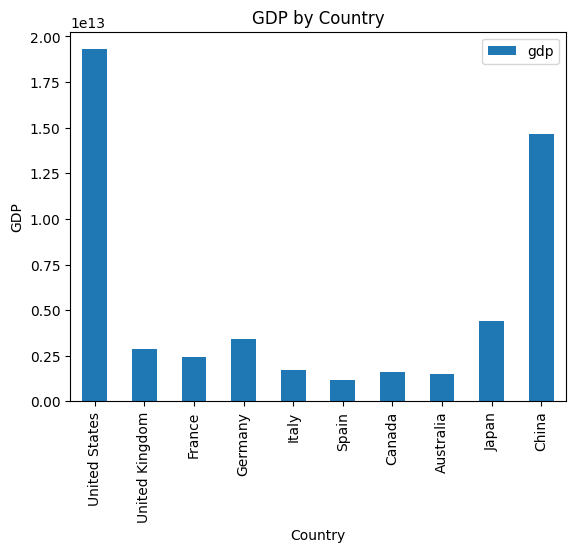

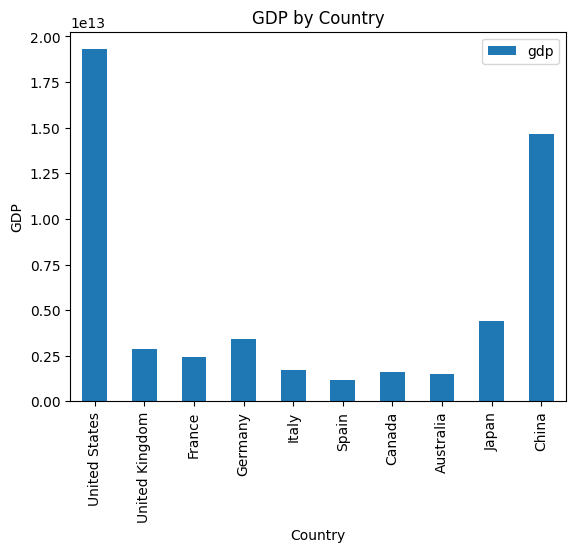

In [ ]:
sdf.chat("Plot a chart of the gdp by country")

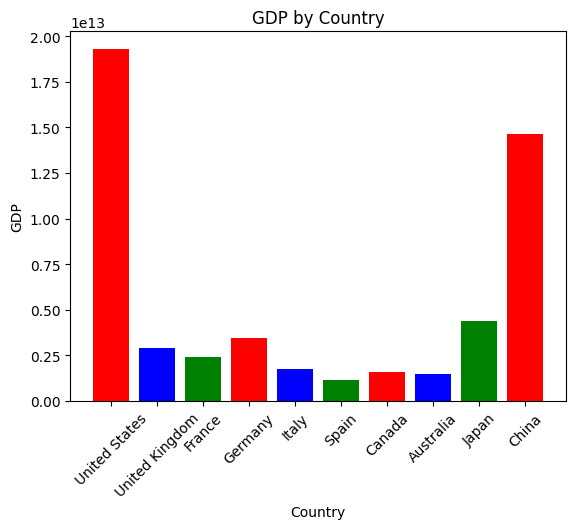

'/content/exports/charts/temp_chart.png'

In [ ]:
sdf.chat("Plot a histogram of the gdp by country, using a different color for each bar")

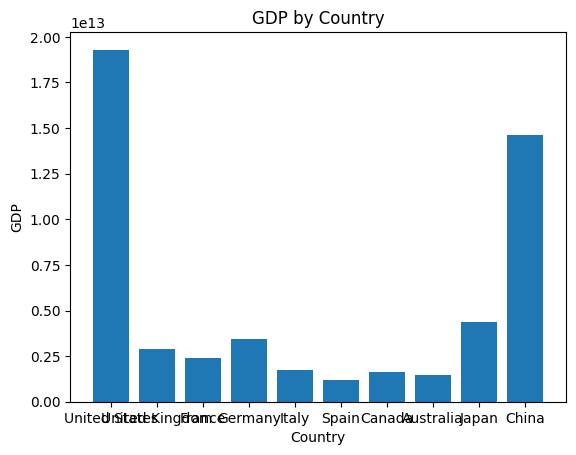

In [ ]:
sdf.plot_bar_chart(x="country", y="gdp")

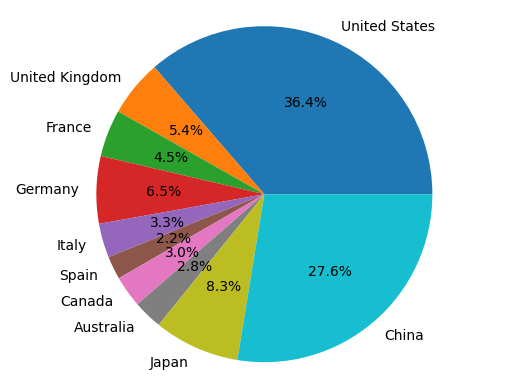

In [ ]:
sdf.plot_pie_chart(labels="country", values="gdp")

In [ ]:
from pandasai import SmartDatalake

In [ ]:
employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)

lake = SmartDatalake(
    [employees_df, salaries_df],
    config={"llm": llm}
)
lake.chat("Who gets paid the most?")

'The employee who gets paid the most is Olivia.'

In [ ]:
print(lake.last_code_executed)

df1 = dfs[0]
df2 = dfs[1]
merged_df = pd.merge(df1, df2, on='EmployeeID')
highest_salary = merged_df['Salary'].max()
employee_with_highest_salary = merged_df.loc[merged_df['Salary'] == highest_salary, 'Name'].values[0]
result = {'type': 'string', 'value': f'The employee who gets paid the most is {employee_with_highest_salary}.'}


In [ ]:
users_df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5],
        "name": ["John", "Emma", "Liam", "Olivia", "William"]
    }
)
users = SmartDataframe(users_df, name="users")

photos_df = pd.DataFrame(
    {
        "id": [31, 32, 33, 34, 35],
        "user_id": [1, 1, 2, 4, 5]
    }
)
photos = SmartDataframe(photos_df, name="photos")

lake = SmartDatalake([users, photos], config={"llm": llm})
lake.chat("How many photos has been uploaded by John?")

2